## Credit Card Limit - Spending Credit Spend with driving factors

<b>Steps for Regression Modelling:</b>

1. <b>Business Problem Definition</b> - How to predict Car Sales Factor based on Car Model with defined factors
2. <b>Convert business problem</b> into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. <b>Finding the right technique</b> - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other Machine Learning techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. <b>Data colletion(Y, X)</b> - Identify the sources of information and collect the data
5. <b>Consolidate the data</b> - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. <b>Data preparation for modeling</b> (create data audit report to identify the steps to perform as part of data preparation)
    a. missinmg value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. <b>Basic assumptions</b> (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)

### Import Packages

In [1157]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import pandas_profiling
import scipy.stats as stats
import sklearn as sk
import statsmodels as sm

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

### Data Audit

In [1158]:
# Import Data

data = pd.read_excel('H:/Machine Learning/DataSet.xlsx')

In [1159]:
#Data Understanding

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

data

custid  region  townsize  gender  age  agecat birthmonth  ed  edcat  jobcat  union  employ  empcat  retire  income     lninc  inccat  debtinc  creddebt  lncreddebt    othdebt  lnothdebt  default  jobsat  marital  spoused  spousedcat  reside  pets  pets_cats  pets_dogs  pets_birds  pets_reptiles  pets_small  pets_saltfish  pets_freshfish  homeown  hometype  address  addresscat  cars  carown  cartype  carvalue  carcatvalue  carbought  carbuy  commute  commutecat  commutetime  commutecar  commutemotorcycle  commutecarpool  commutebus  commuterail  commutepublic  commutebike  commutewalk  commutenonmotor  telecommute  reason  polview  polparty  polcontrib  vote  card  cardtype  cardbenefit  cardfee  cardtenure  cardtenurecat  card2  card2type  card2benefit  card2fee  card2tenure  card2tenurecat  cardspent  card2spent  active  bfast  tenure  churn  longmon  lnlongmon  longten  lnlongten  tollfree  tollmon  lntollmon  tollten  lntollten  equip  equipmon  lnequipmon  \
0     3964-QJWTRG-NPN       1       2.0       1   20       2  September  15      3       1      1       0       1       0      31  3.433987       2     11.1  1.200909    0.183079   2.240091   0.806516        1       1        0       -1          -1       3     0          0          0           0              0           0              0               0        0         2        0           1     2       1        0      14.3            1          0       0        8           4         22.0           0                  1               1           0            0              0            0            1                0            0       9        6         1           0     1     3         1            1        0           2              2      5          3             1         0            3               2      81.66       67.80       0      3       5      1     6.50   1.871802    34.40   3.538057         1     29.0   3.367296   161.05   5.081715      1     29.50    3.384390   
1     0648-AIPJSP-UVM       5       5.0       0   22       2        May  17      4       2      0       0       1       0      15  2.708050       1     18.6  1.222020    0.200505   1.567980   0.449788        1       1        0       -1          -1       2     6          0          0           0              0           0              0               6        1         3        2           1     2       1        1       6.8            1          0       0        1           1         29.0           1                  0               0           1            0              0            1            0                1            1       9        4         1           0     0     2         4            1        0           4              2      4          1             3         0            4               2      42.60       34.94       1      1      39      0     8.90   2.186051   330.60   5.800909         0      0.0        NaN     0.00        NaN      1     54.85    4.004602   
2     5195-TLUDJE-HVO       3       4.0       1   67       6       June  14      2       2      0      16       5       0      35  3.555348       2      9.9  0.928620   -0.074056   2.536380   0.930738        0       4        1       13           2       3     3          2          1           0              0           0              0               0        1         1       30           5     3       1        1      18.8            1          0       1        4           3         24.0           1                  0               1           1            1              0            0            0                0            0       2        5         1           0     0     2         1            4        0          35              5      4          1             3         0           25               5     184.22      175.75       0      3      65      0    28.40   3.346389  1858.35   7.527444         0      0.0        NaN     0.00        NaN      0      0.00         NaN   
3     4459-VLPQUH-3OL       4       3.0       0

In [1160]:
#Checking Missing Values

sum(data.isnull().sum())

22003

In [1161]:
#Checking Column and their Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [1162]:
#Checking Data Dimension 

data.shape

(5000, 130)

### Data Analysis

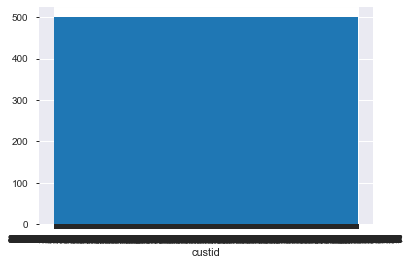

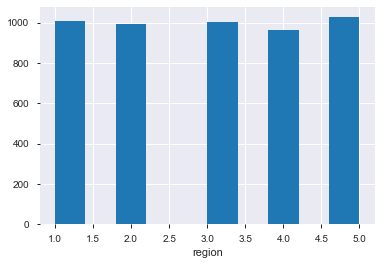

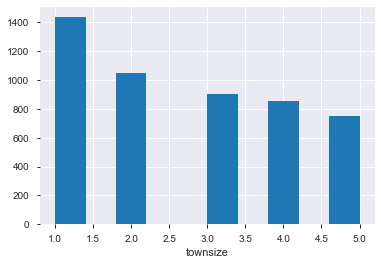

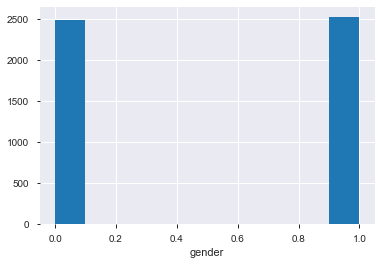

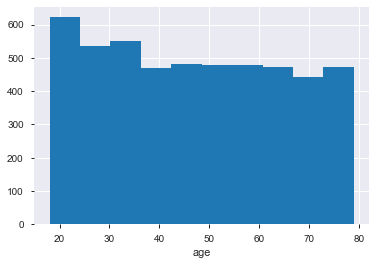

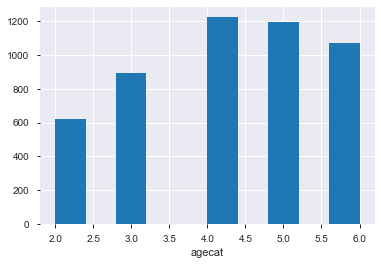

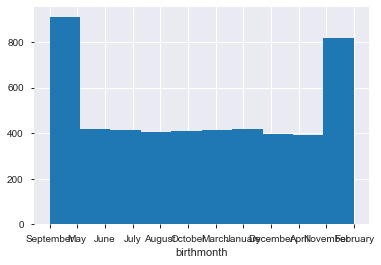

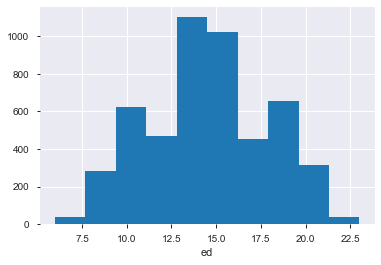

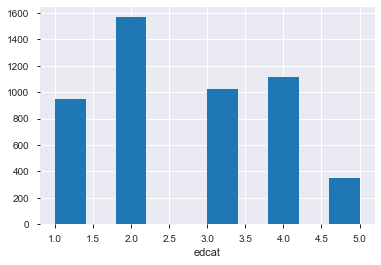

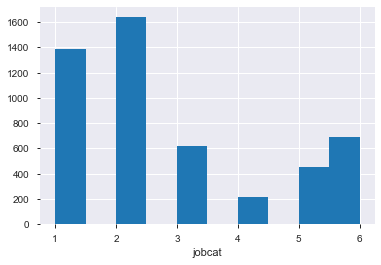

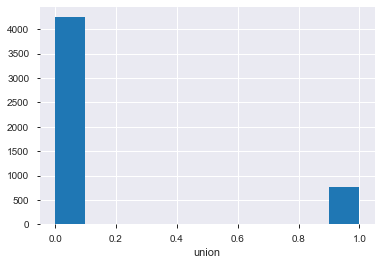

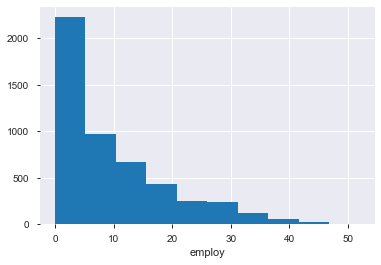

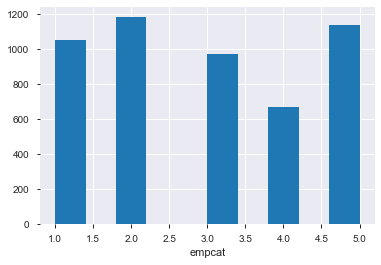

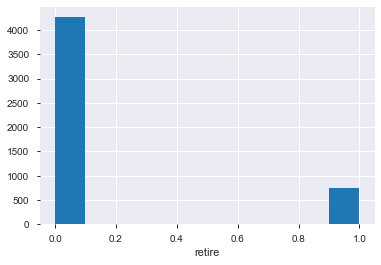

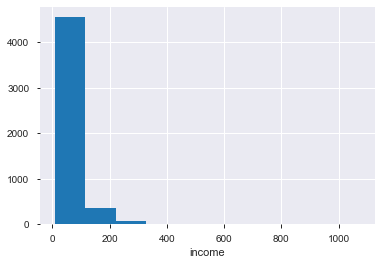

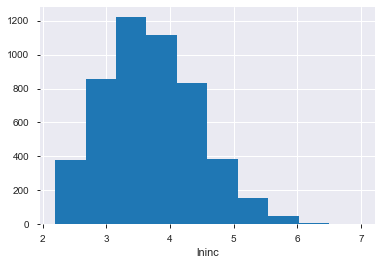

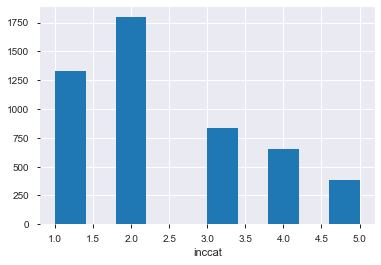

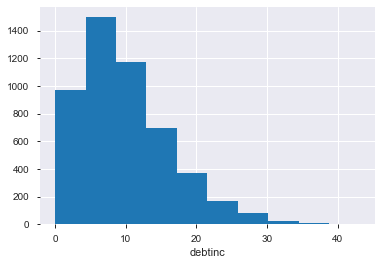

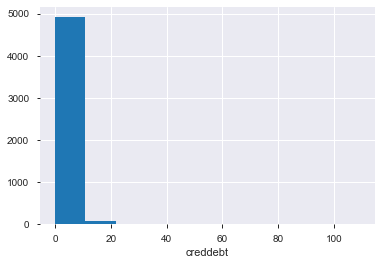

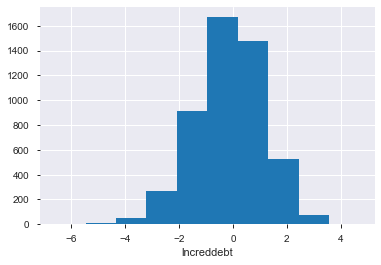

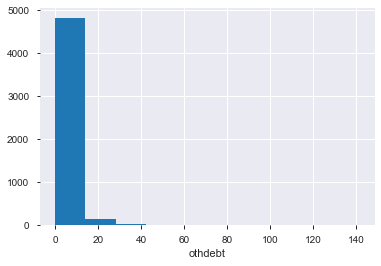

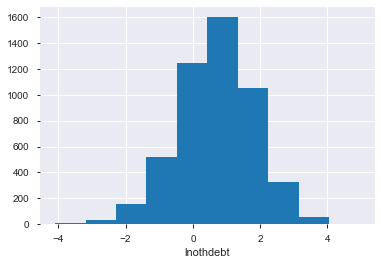

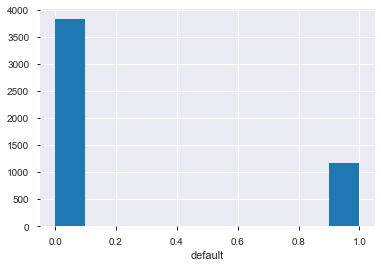

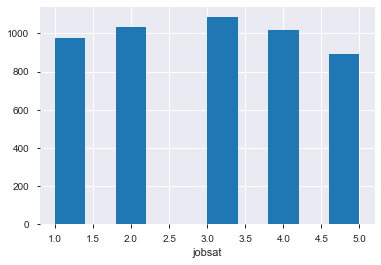

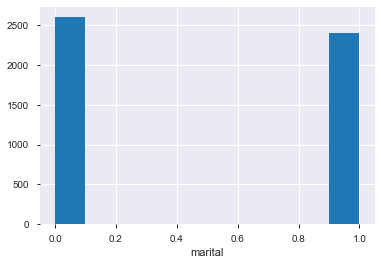

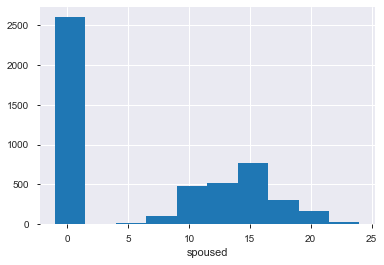

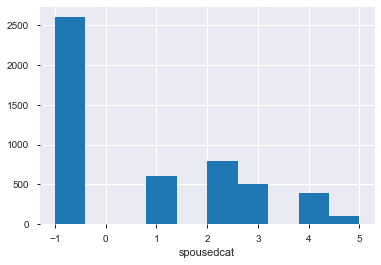

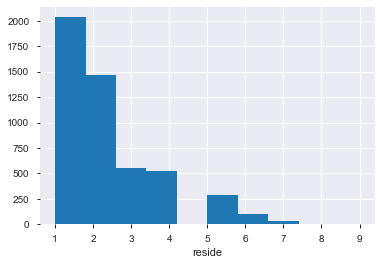

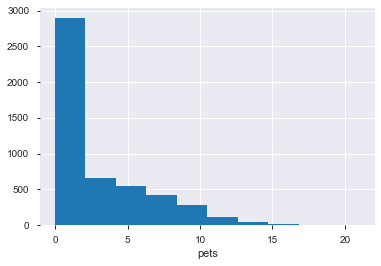

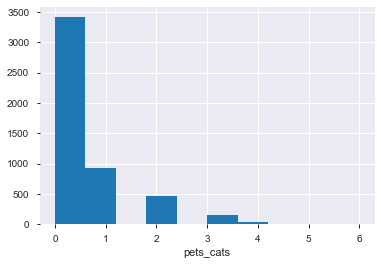

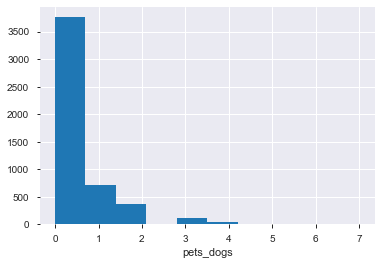

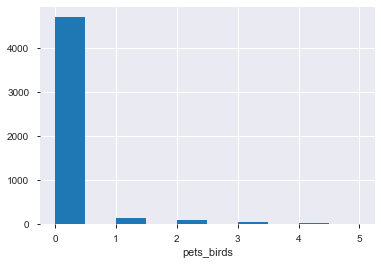

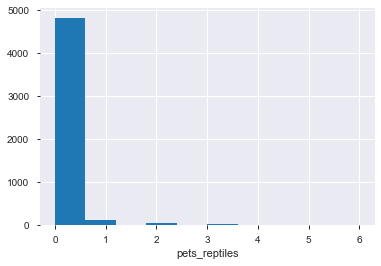

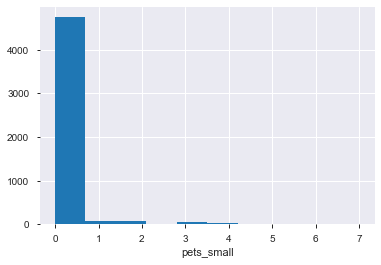

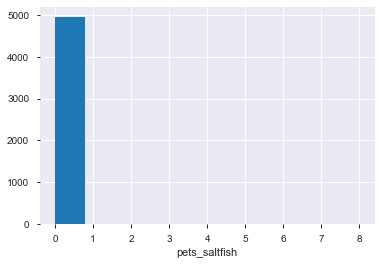

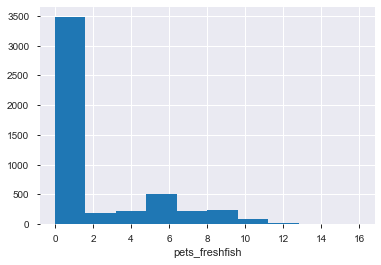

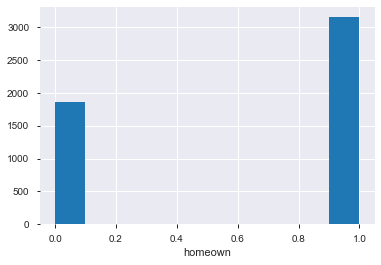

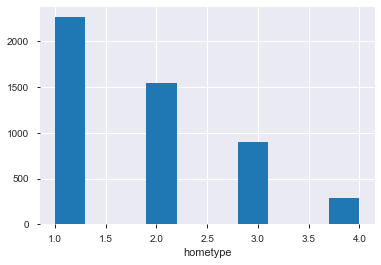

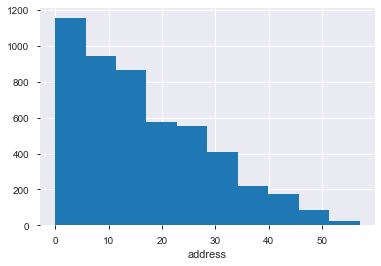

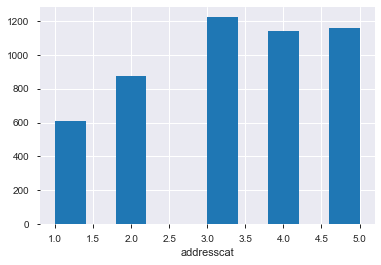

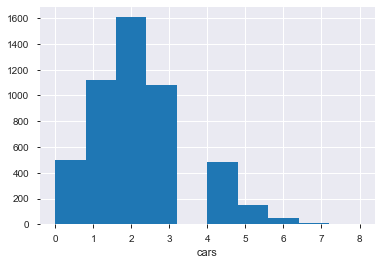

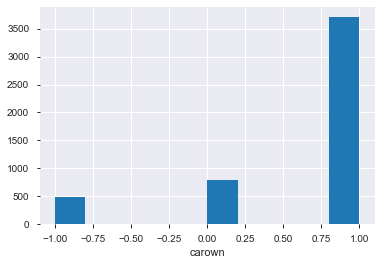

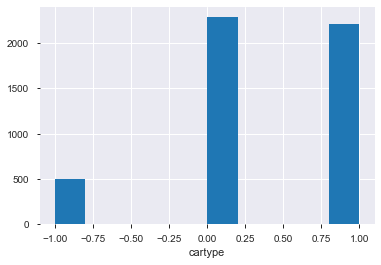

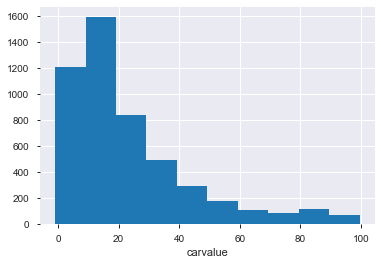

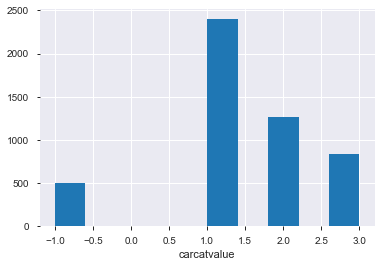

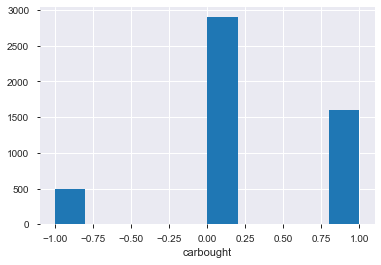

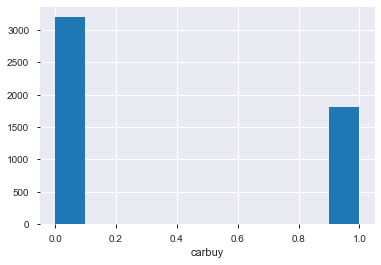

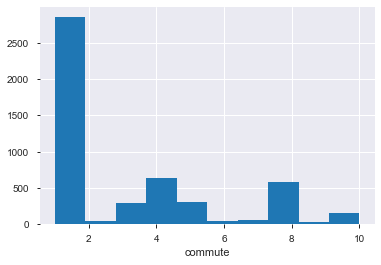

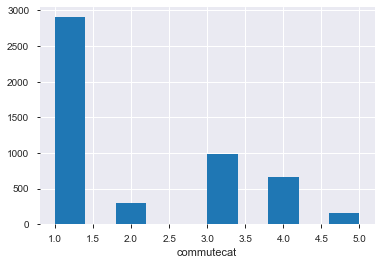

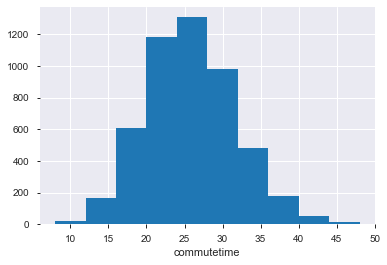

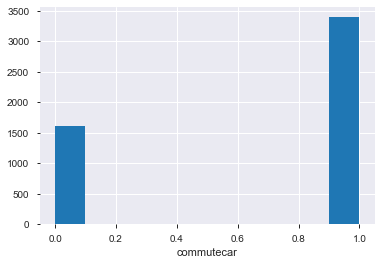

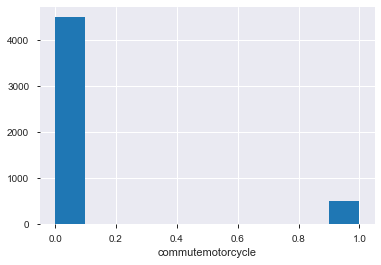

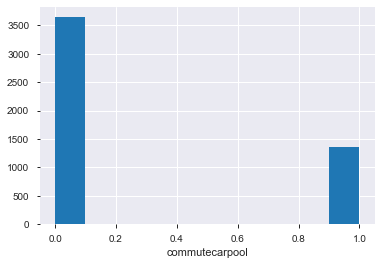

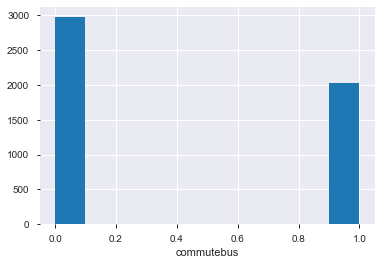

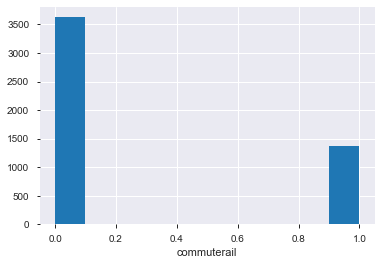

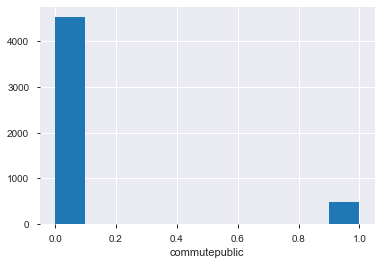

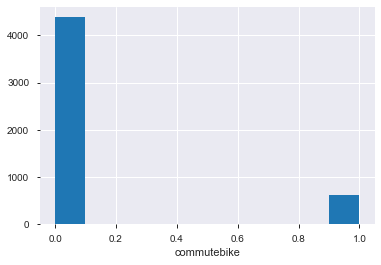

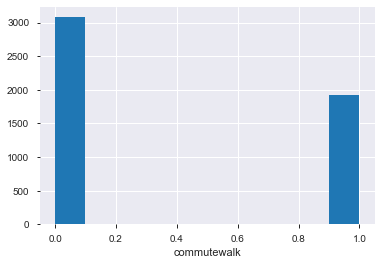

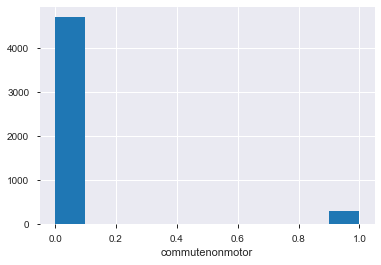

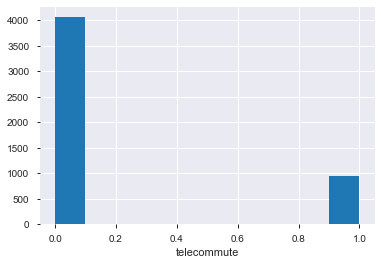

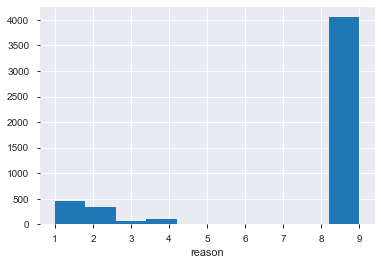

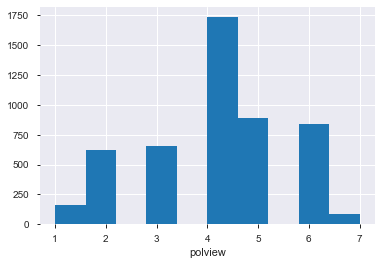

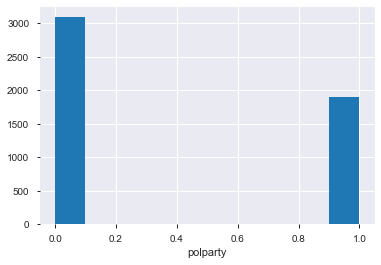

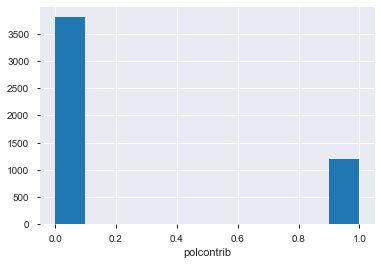

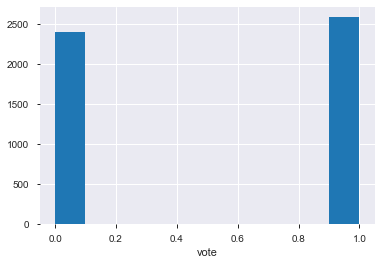

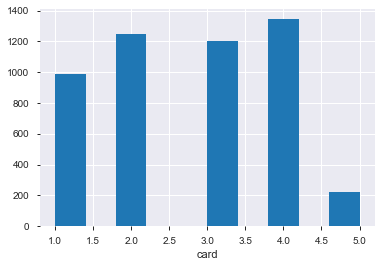

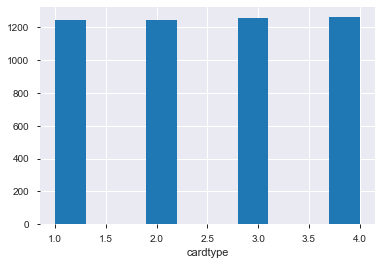

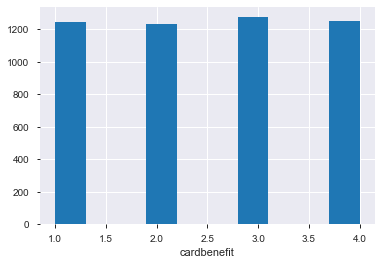

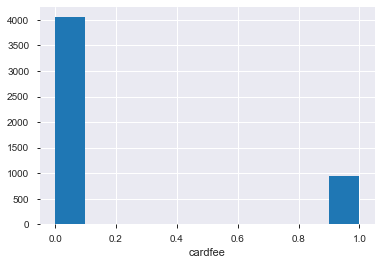

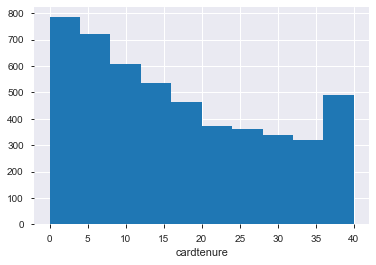

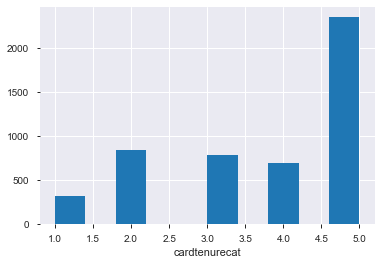

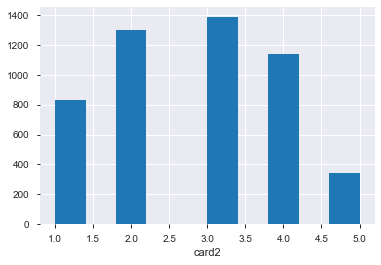

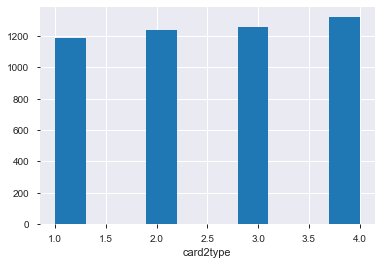

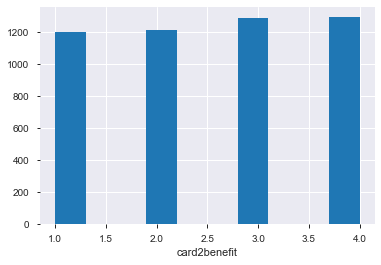

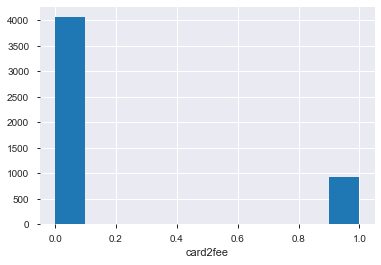

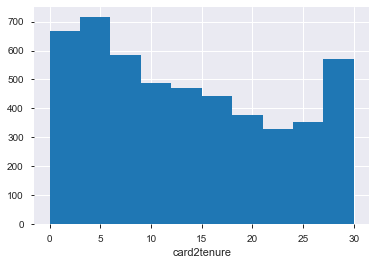

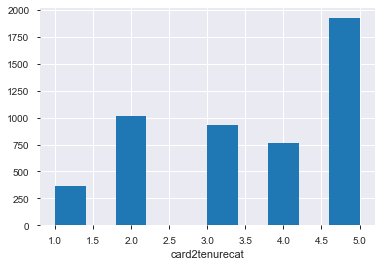

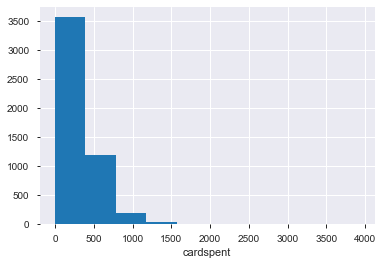

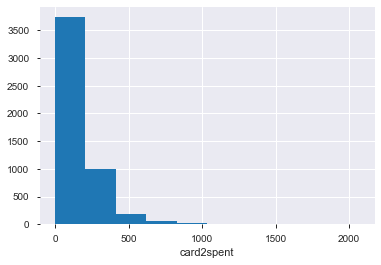

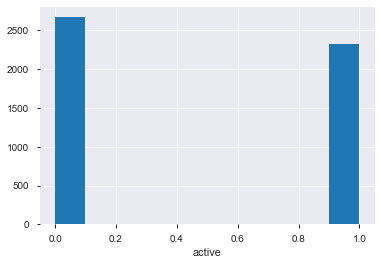

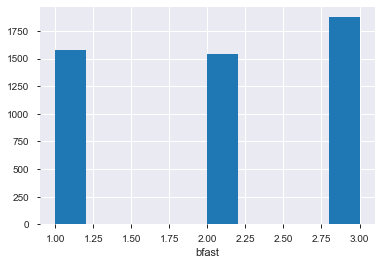

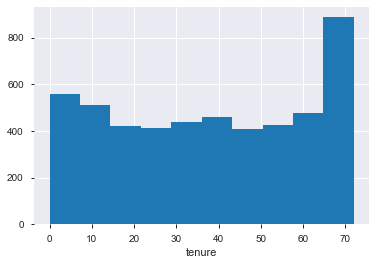

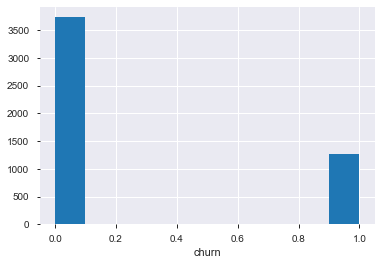

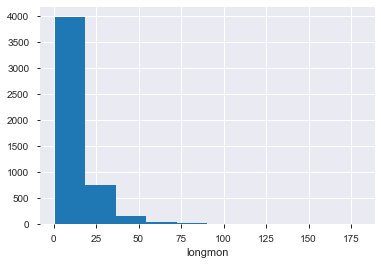

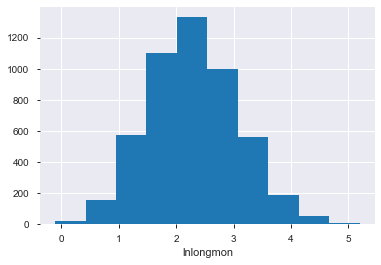

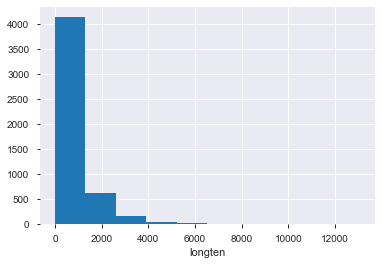

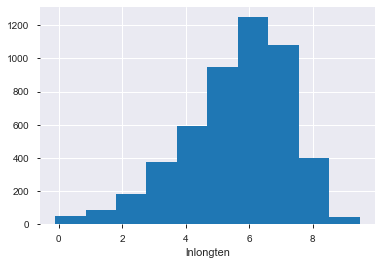

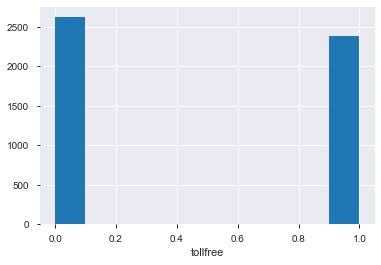

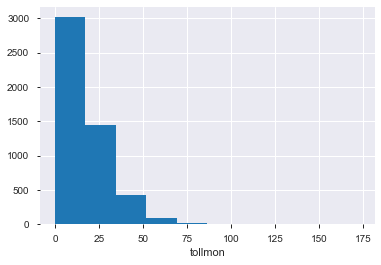

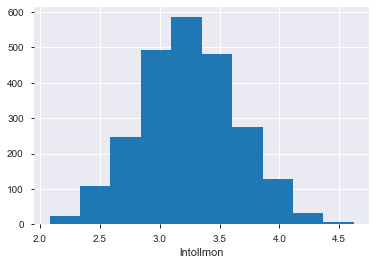

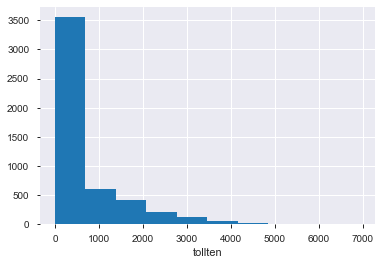

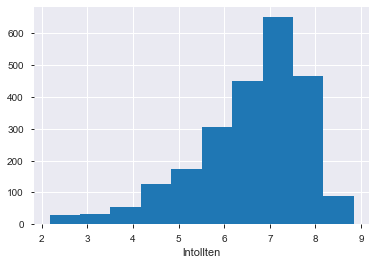

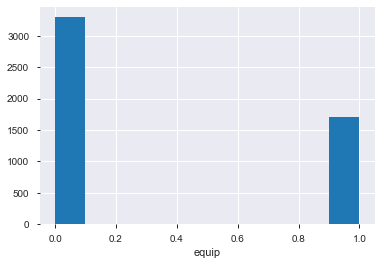

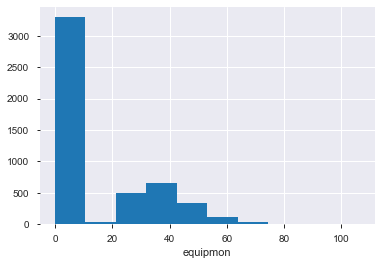

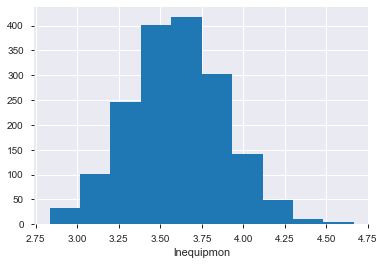

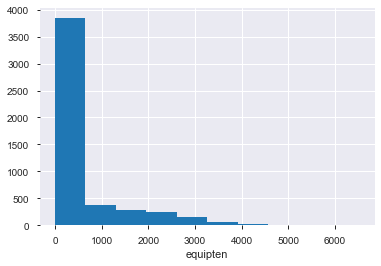

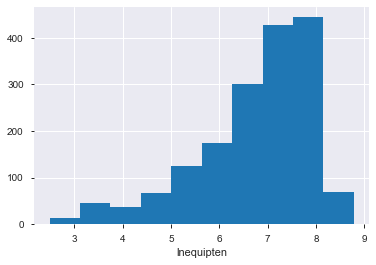

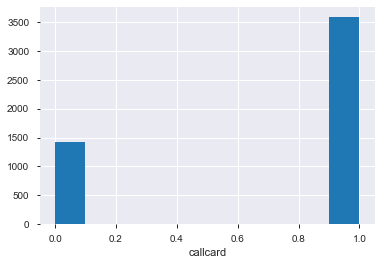

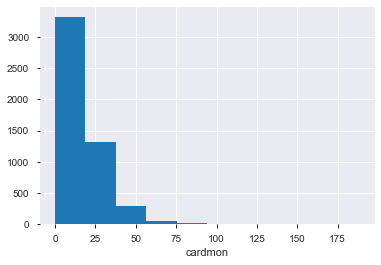

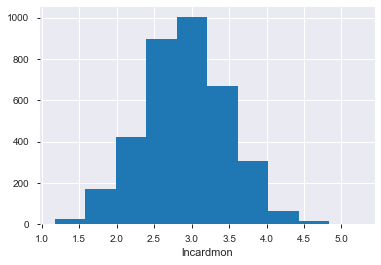

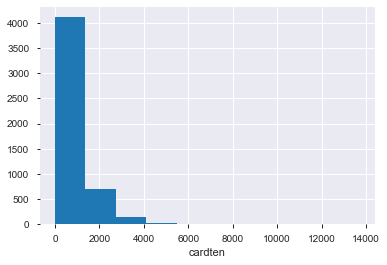

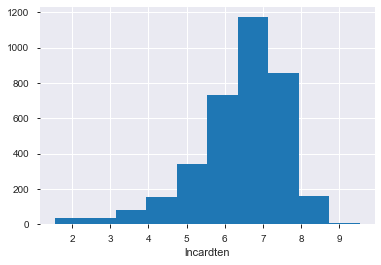

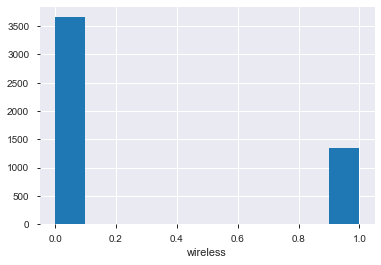

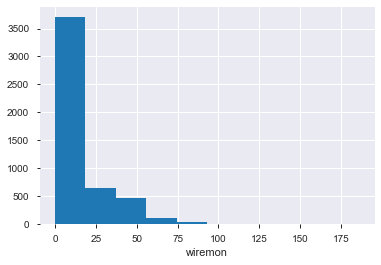

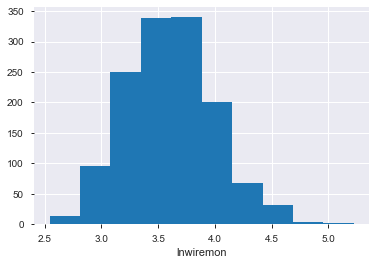

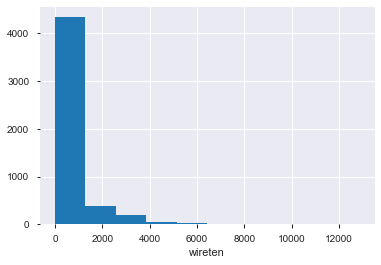

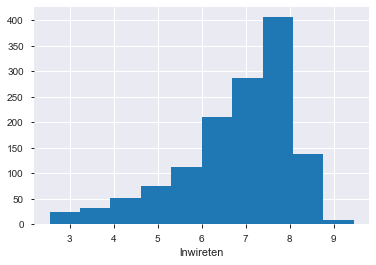

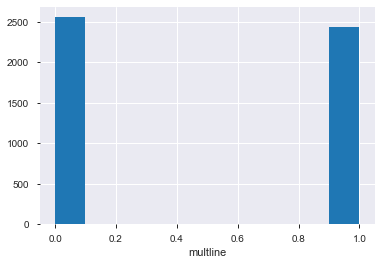

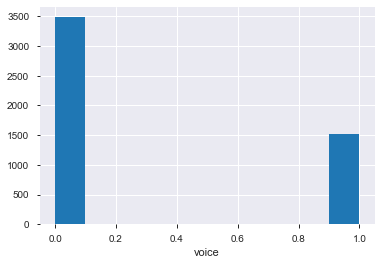

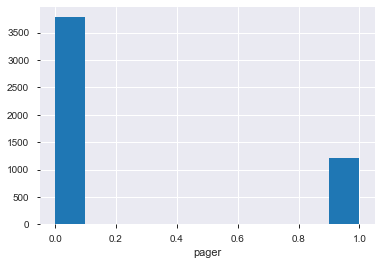

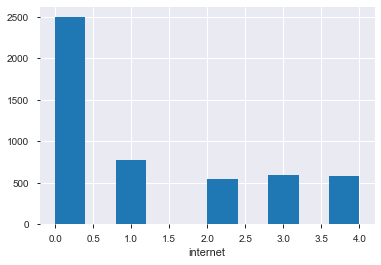

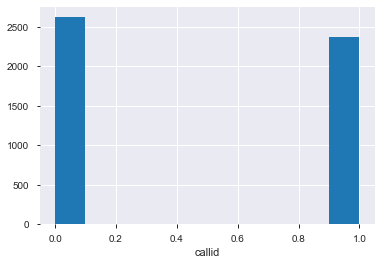

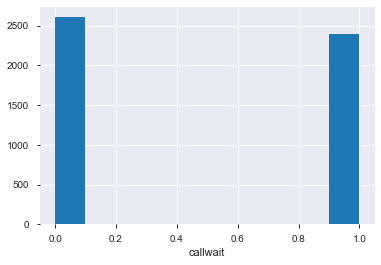

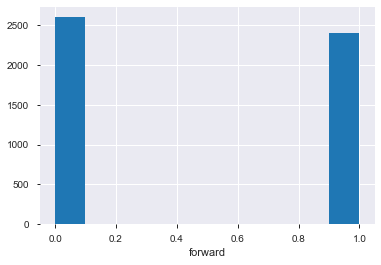

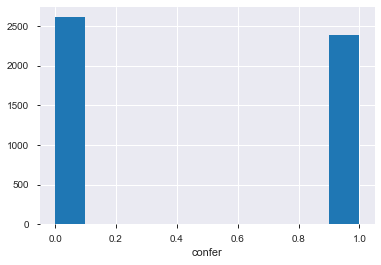

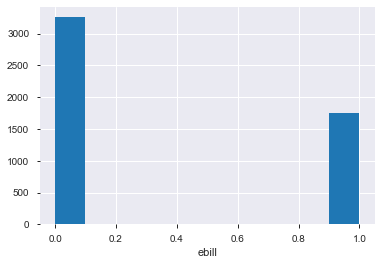

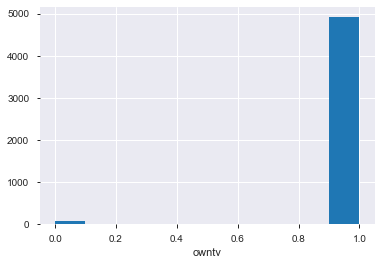

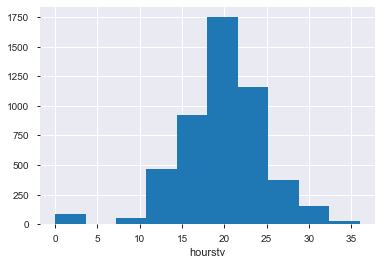

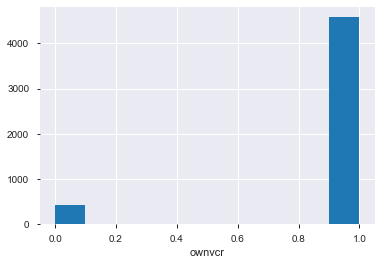

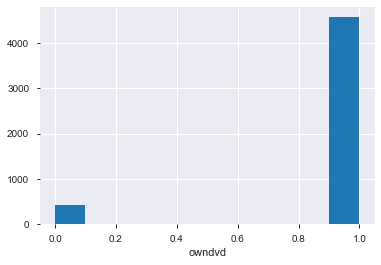

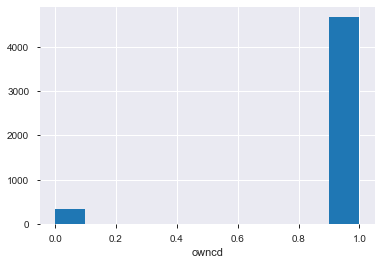

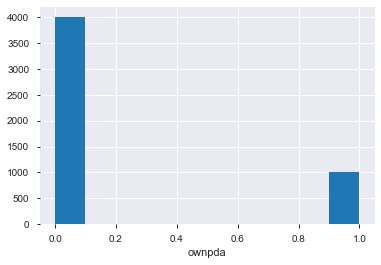

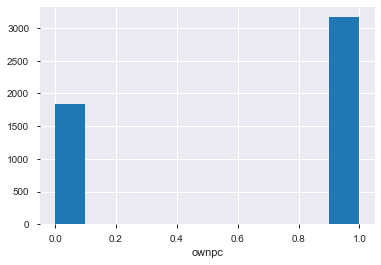

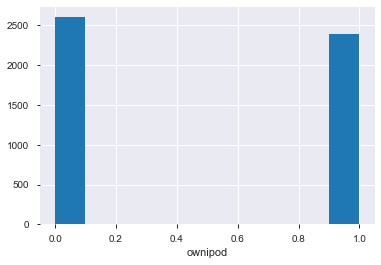

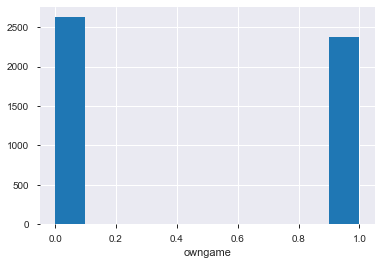

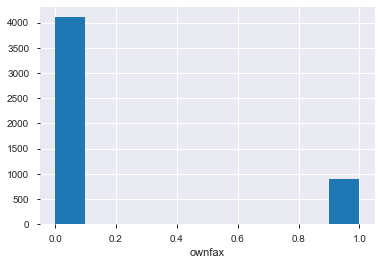

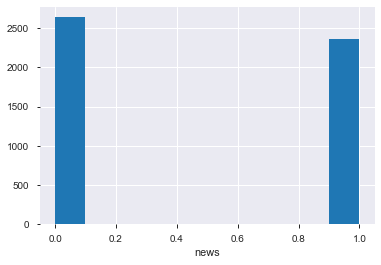

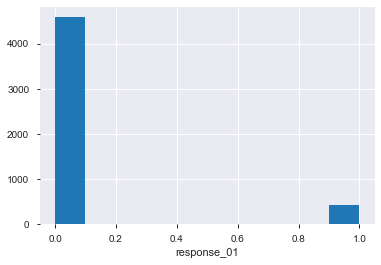

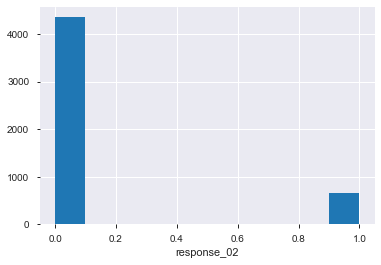

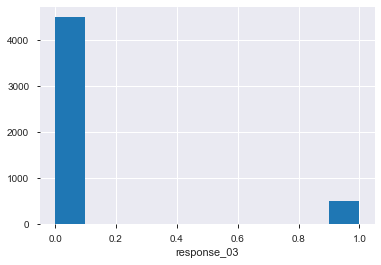

In [541]:
## Univariate Analysis

for x in data.columns:
    data[x].hist()
    plt.xlabel(str(x))
    plt.show()

In [1163]:
data['TotalSpend'] = data.card2spent + data.cardspent

In [1164]:
data.head()

custid  region  townsize  gender  age  agecat birthmonth  ed  edcat  jobcat  union  employ  empcat  retire  income     lninc  inccat  debtinc  creddebt  lncreddebt   othdebt  lnothdebt  default  jobsat  marital  spoused  spousedcat  reside  pets  pets_cats  pets_dogs  pets_birds  pets_reptiles  pets_small  pets_saltfish  pets_freshfish  homeown  hometype  address  addresscat  cars  carown  cartype  carvalue  carcatvalue  carbought  carbuy  commute  commutecat  commutetime  commutecar  commutemotorcycle  commutecarpool  commutebus  commuterail  commutepublic  commutebike  commutewalk  commutenonmotor  telecommute  reason  polview  polparty  polcontrib  vote  card  cardtype  cardbenefit  cardfee  cardtenure  cardtenurecat  card2  card2type  card2benefit  card2fee  card2tenure  card2tenurecat  cardspent  card2spent  active  bfast  tenure  churn  longmon  lnlongmon  longten  lnlongten  tollfree  tollmon  lntollmon  tollten  lntollten  equip  equipmon  lnequipmon  equipten  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15      3       1      1       0       1       0      31  3.433987       2     11.1  1.200909    0.183079  2.240091   0.806516        1       1        0       -1          -1       3     0          0          0           0              0           0              0               0        0         2        0           1     2       1        0      14.3            1          0       0        8           4         22.0           0                  1               1           0            0              0            0            1                0            0       9        6         1           0     1     3         1            1        0           2              2      5          3             1         0            3               2      81.66       67.80       0      3       5      1     6.50   1.871802    34.40   3.538057         1     29.0   3.367296   161.05   5.081715      1     29.50    3.384390     126.1   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17      4       2      0       0       1       0      15  2.708050       1     18.6  1.222020    0.200505  1.567980   0.449788        1       1        0       -1          -1       2     6          0          0           0              0           0              0               6        1         3        2           1     2       1        1       6.8            1          0       0        1           1         29.0           1                  0               0           1            0              0            1            0                1            1       9        4         1           0     0     2         4            1        0           4              2      4          1             3         0            4               2      42.60       34.94       1      1      39      0     8.90   2.186051   330.60   5.800909         0      0.0        NaN     0.00        NaN      1     54.85    4.004602    1975.0   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14      2       2      0      16       5       0      35  3.555348       2      9.9  0.928620   -0.074056  2.536380   0.930738        0       4        1       13           2       3     3          2          1           0              0           0              0               0        1         1       30           5     3       1        1      18.8            1          0       1        4           3         24.0           1                  0               1           1            1              0            0            0                0            0       2        5         1           0     0     2         1            4        0          35              5      4          1             3         0           25               5     184.22      175.75       0      3      65      0    28.40   3.346389  1858.35   7.527444         0      0.0        NaN     0.00        NaN      0      0.00         NaN       0.0   
3  4459-VLPQUH-3OL  

In [544]:
pandas_profiling.ProfileReport(data)

In [1165]:
## As per Profile Report Dropping columns - more than 50% zero and highly correlated
## Income, Cred debt ,Car value and Othr Debt is highly corelated - Only Income parameter is chosen

data = data.drop(columns=['carvalue','creddebt','othdebt','cartype','lnothdebt','custid','agecat','edcat','lninc','spoused','spousedcat','pets','pets_cats','pets_dogs','pets_birds','pets_reptiles','pets_small','pets_saltfish','pets_freshfish','addresscat','birthmonth','commutecat','cardtenurecat','card2tenure','card2tenurecat','tenure','longten','lnlongten','lnlongmon','tollmon','lntollmon','tollten','lntollten','lnlongten','equipmon','lnequipmon','equipten','lnequipten','lncardmon','lncardten','wiremon','lnwiremon','wireten','lnwireten','cardspent','card2spent','lncreddebt'])

In [1166]:
data.columns

Index(['region', 'townsize', 'gender', 'age', 'ed', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'inccat', 'debtinc', 'default', 'jobsat', 'marital', 'reside', 'homeown', 'hometype', 'address', 'cars', 'carown', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'churn', 'longmon', 'tollfree', 'equip', 'callcard', 'cardmon', 'cardten', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'hourstv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03', 'TotalSpend'], dtype='object'

In [1167]:
#Converting -Negative values to 0

data = data.clip_lower(0)

In [1168]:
data

region  townsize  gender  age  ed  jobcat  union  employ  empcat  retire  income  inccat  debtinc  default  jobsat  marital  reside  homeown  hometype  address  cars  carown  carcatvalue  carbought  carbuy  commute  commutetime  commutecar  commutemotorcycle  commutecarpool  commutebus  commuterail  commutepublic  commutebike  commutewalk  commutenonmotor  telecommute  reason  polview  polparty  polcontrib  vote  card  cardtype  cardbenefit  cardfee  cardtenure  card2  card2type  card2benefit  card2fee  active  bfast  churn  longmon  tollfree  equip  callcard  cardmon  cardten  wireless  multline  voice  pager  internet  callid  callwait  forward  confer  ebill  owntv  hourstv  ownvcr  owndvd  owncd  ownpda  ownpc  ownipod  owngame  ownfax  news  response_01  response_02  response_03  TotalSpend
0          1       2.0       1   20  15       1      1       0       1       0      31       2     11.1        1       1        0       3        0         2        0     2       1            1          0       0        8         22.0           0                  1               1           0            0              0            0            1                0            0       9        6         1           0     1     3         1            1        0           2      5          3             1         0       0      3      1     6.50         1      1         1    14.25     60.0         0         1      1      1         0       0         1        1       1      0      1       13       1       1      0       0      0        1        1       0     0            0            1            0      149.46
1          5       5.0       0   22  17       2      0       0       1       0      15       1     18.6        1       1        0       2        1         3        2     2       1            1          0       0        1         29.0           1                  0               0           1            0              0            1            0                1            1       9        4         1           0     0     2         4            1        0           4      4          1             3         0       1      1      0     8.90         0      1         1    16.00    610.0         1         1      1      1         4       1         0        1       0      1      1       18       1       1      1       1      1        1        1       1     1            0            0            0       77.54
2          3       4.0       1   67  14       2      0      16       5       0      35       2      9.9        0       4        1       3        1         1       30     3       1            1          0       1        4         24.0           1                  0               1           1            1              0            0            0                0            0       2        5         1           0     0     2         1            4        0          35      4          1             3         0       0      3      0    28.40         0      0         1    23.00   1410.0         0         1      0      0         0       0         0        0       0      0      1       21       1       1      1       0      0        0        0       0     1            0            0            0      359.97
3          4       3.0       0   23  16       2      0       0       1       0      20       1      5.7        1       2        1       5        1         3        3     3       1            1          0       1        1         38.0           1                  0               0           0            0              0            0            0                0            0       9        3         0           0     0     2         1            4        0           5      3          2             4         0       1      1      0     6.00         0      0         1    21.00    685.0         0         1      0      0         2       0         0        0       0      1      1       26       1       1      1       0      1        1        1       

### Data Visualization

<BarContainer object of 5000 artists>

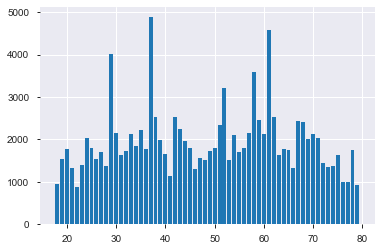

In [632]:
##Bivariate Analysis - Annova Plot

plt.bar(x= data.age,height=data.TotalSpend,data=data)

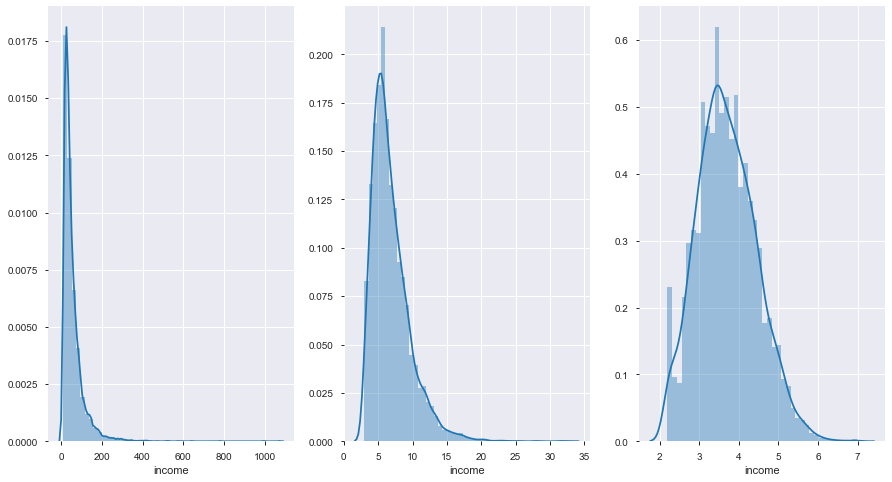

In [1169]:
#Plotting Income varibale skewness in distlot
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.distplot((data.income))

plt.subplot(1,3,2)
sns.distplot(np.sqrt(data.income))

plt.subplot(1,3,3)
sns.distplot(np.log(data.income))

## Observation - Sqrt of Income gives better distribution than Normal Income

In [1170]:
temp = data.groupby(by = ['gender'])
res1 = temp[['TotalSpend']].sum()
res1.reset_index()

gender  TotalSpend
0       0  1303130.10
1       1  1187263.05

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000204A8EE5D48>],
      dtype=object)

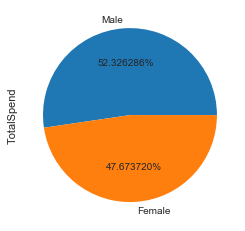

In [1171]:
labels = ['Male','Female']
res1.plot(kind='pie',subplots = True,labels = labels,legend = False,autopct ='%2f%%')

## Male spend more in Credit Card than Females

In [1172]:
temp = data.groupby(by = ['ed'])
res2 = temp[['TotalSpend']].sum()
res2.reset_index()

ed  TotalSpend
0    6     2788.42
1    7    11747.19
2    8    47349.30
3    9    80677.08
4   10   121333.19
5   11   168403.35
6   12   219160.86
7   13   234127.92
8   14   287395.26
9   15   272593.55
10  16   249145.92
11  17   248606.05
12  18   185165.64
13  19   162302.27
14  20   114167.27
15  21    66212.25
16  22    16611.89
17  23     2605.74

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000204A8BF6188>],
      dtype=object)

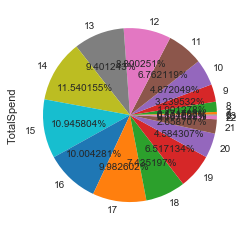

In [1173]:
res2.plot(kind='pie',subplots = True,legend = False,autopct ='%2f%%')

### Data Preparation

In [1174]:
data.head()

region  townsize  gender  age  ed  jobcat  union  employ  empcat  retire  income  inccat  debtinc  default  jobsat  marital  reside  homeown  hometype  address  cars  carown  carcatvalue  carbought  carbuy  commute  commutetime  commutecar  commutemotorcycle  commutecarpool  commutebus  commuterail  commutepublic  commutebike  commutewalk  commutenonmotor  telecommute  reason  polview  polparty  polcontrib  vote  card  cardtype  cardbenefit  cardfee  cardtenure  card2  card2type  card2benefit  card2fee  active  bfast  churn  longmon  tollfree  equip  callcard  cardmon  cardten  wireless  multline  voice  pager  internet  callid  callwait  forward  confer  ebill  owntv  hourstv  ownvcr  owndvd  owncd  ownpda  ownpc  ownipod  owngame  ownfax  news  response_01  response_02  response_03  TotalSpend
0       1       2.0       1   20  15       1      1       0       1       0      31       2     11.1        1       1        0       3        0         2        0     2       1            1          0       0        8         22.0           0                  1               1           0            0              0            0            1                0            0       9        6         1           0     1     3         1            1        0           2      5          3             1         0       0      3      1     6.50         1      1         1    14.25     60.0         0         1      1      1         0       0         1        1       1      0      1       13       1       1      0       0      0        1        1       0     0            0            1            0      149.46
1       5       5.0       0   22  17       2      0       0       1       0      15       1     18.6        1       1        0       2        1         3        2     2       1            1          0       0        1         29.0           1                  0               0           1            0              0            1            0                1            1       9        4         1           0     0     2         4            1        0           4      4          1             3         0       1      1      0     8.90         0      1         1    16.00    610.0         1         1      1      1         4       1         0        1       0      1      1       18       1       1      1       1      1        1        1       1     1            0            0            0       77.54
2       3       4.0       1   67  14       2      0      16       5       0      35       2      9.9        0       4        1       3        1         1       30     3       1            1          0       1        4         24.0           1                  0               1           1            1              0            0            0                0            0       2        5         1           0     0     2         1            4        0          35      4          1             3         0       0      3      0    28.40         0      0         1    23.00   1410.0         0         1      0      0         0       0         0        0       0      0      1       21       1       1      1       0      0        0        0       0     1            0            0            0      359.97
3       4       3.0       0   23  16       2      0       0       1       0      20       1      5.7        1       2        1       5        1         3        3     3       1            1          0       1        1         38.0           1                  0               0           0            0              0            0            0                0            0       9        3         0           0     0     2         1            4        0           5      3          2             4         0       1      1      0     6.00         0      0         1    21.00    685.0         0         1      0      0         2       0         0        0       0      1      1       26       1       1      1       0      1        1        1       0     1     

In [1175]:
## Dividing Data into Categorical and Numerical

continous_feature = ['age','ed','income','debtinc','commutetime','longmon','cardmon','cardten','hourstv','address','cars','hourstv','TotalSpend']
multinomial_feature = ['region','townsize','jobcat','employ','empcat','jobsat','reside','hometype','carcatvalue','commute','reason','polview','card','cardtype','cardbenefit','cardtenure','reason','polview','card2','card2type','card2benefit','bfast','internet']
binomial_dfeature = ['gender','union','retire','default','marital','homeown','carown','carbought','carbuy','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutenonmotor','telecommute','polparty','polcontrib','vote','cardfee','active','churn','tollfree','equip','callcard','wireless','multline','voice','pager','callid','callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','news','response_01','response_02','response_03']

continous_vars = data[continous_feature]
binomial_vars = data[binomial_dfeature]
multinomial_vars = data[multinomial_feature]

### Prepare Audit Report for Continous and Numerical Variable

In [1176]:
## Create Data audit Report for continuous variables

def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [1177]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

#### Applying Data Audit before Implementing Missing Value and Outlier Treatment

In [1178]:
continous_vars.apply(continuous_var_summary).T

N  NMISS         SUM        MEAN  MEDIAN         STD            VAR    MIN       P1       P5      P10       P25     P50        P75       P90        P95        P99       MAX
age          5000.0    0.0   235128.00   47.025600   47.00   17.770338     315.784902  18.00  18.0000   20.000   23.000   31.0000   47.00    62.0000    72.000    76.0000    79.0000     79.00
ed           5000.0    0.0    72715.00   14.543000   14.00    3.281083      10.765504   6.00   8.0000    9.000   10.000   12.0000   14.00    17.0000    19.000    20.0000    21.0000     23.00
income       5000.0    0.0   273798.00   54.759600   38.00   55.377511    3066.668742   9.00   9.0000   13.000   16.000   24.0000   38.00    67.0000   109.100   147.0000   272.0100   1073.00
debtinc      5000.0    0.0    49770.80    9.954160    8.80    6.399783      40.957226   0.00   0.7000    1.900    2.800    5.1000    8.80    13.6000    18.600    22.2000    29.2000     43.10
commutetime  4998.0    2.0   126677.00   25.345538   25.00    5.879149      34.564390   8.00  13.0000   16.000   18.000   21.0000   25.00    29.0000    33.000    35.0000    40.0300     48.00
longmon      5000.0    0.0    67357.25   13.471450    9.55   12.773381     163.159266   0.90   1.8500    2.900    3.700    5.7000    9.55    16.5500    27.000    36.7575    65.2010    179.85
cardmon      5000.0    0.0    77219.25   15.443850   13.75   15.007569     225.227130   0.00   0.0000    0.000    0.000    0.0000   13.75    22.7500    34.000    42.0000    64.2500    188.50
cardten      4998.0    2.0  3600951.00  720.478391  425.00  922.225527  850499.921936   0.00   0.0000    0.000    0.000    0.0000  425.00  1080.0000  1871.500  2455.7500  4011.2000  13705.00
hourstv      5000.0    0.0    98225.00   19.645000   20.00    5.165609      26.683512   0.00   0.0000   12.000   14.000   17.0000   20.00    23.0000    26.000    28.0000    31.0000     36.00
address      5000.0    0.0    82012.00   16.402400   14.00   12.397484     153.697614   0.00   0.0000    1.000    2.000    6.0000   14.00    25.0000    34.000    40.0000    48.0000     57.00
cars         5000.0    0.0    10653.00    2.130600    2.00    1.307473       1.709486   0.00   0.0000    0.000    1.000    1.0000    2.00     3.0000     4.000     4.0000     6.0000      8.00
hourstv      5000.0    0.0    98225.00   19.645000   20.00    5.165609      26.683512   0.00   0.0000   12.000   14.000   17.0000   20.00    23.0000    26.000    28.0000    31.0000     36.00
TotalSpend   5000.0    0.0  2490393.15  498.078630  414.25  351.529270  123572.827720   8.11  58.1976  133.106  184.033  276.2825  414.25   615.5625   908.125  1145.1465  1760.1024   4881.05

In [1179]:
multinomial_vars.apply(categorical_var_summary).T

N  NMISS  MODE    FREQ  PERCENT
region        5000.0    0.0   5.0  1027.0    20.54
townsize      4998.0    2.0   1.0  1436.0    28.73
jobcat        5000.0    0.0   2.0  1640.0    32.80
employ        5000.0    0.0   0.0   659.0    13.18
empcat        5000.0    0.0   2.0  1180.0    23.60
jobsat        5000.0    0.0   3.0  1085.0    21.70
reside        5000.0    0.0   1.0  2035.0    40.70
hometype      5000.0    0.0   1.0  2265.0    45.30
carcatvalue   5000.0    0.0   1.0  2399.0    47.98
commute       5000.0    0.0   1.0  2855.0    57.10
reason        5000.0    0.0   9.0  4052.0    81.04
polview       5000.0    0.0   4.0  1733.0    34.66
card          5000.0    0.0   4.0  1344.0    26.88
cardtype      5000.0    0.0   4.0  1260.0    25.20
cardbenefit   5000.0    0.0   3.0  1274.0    25.48
cardtenure    5000.0    0.0   3.0   246.0     4.92
reason        5000.0    0.0   9.0  4052.0    81.04
polview       5000.0    0.0   4.0  1733.0    34.66
card2         5000.0    0.0   3.0  1384.0    27.68
card2type     5000.0    0.0   4.0  1319.0    26.38
card2benefit  5000.0    0.0   4.0  1294.0    25.88
bfast         5000.0    0.0   3.0  1875.0    37.50
internet      5000.0    0.0   0.0  2498.0    49.96

In [1180]:
binomial_vars.apply(categorical_var_summary).T

N  NMISS  MODE    FREQ  PERCENT
gender             5000.0    0.0   1.0  2518.0    50.36
union              5000.0    0.0   0.0  4244.0    84.88
retire             5000.0    0.0   0.0  4262.0    85.24
default            5000.0    0.0   0.0  3829.0    76.58
marital            5000.0    0.0   0.0  2599.0    51.98
homeown            5000.0    0.0   1.0  3148.0    62.96
carown             5000.0    0.0   1.0  3704.0    74.08
carbought          5000.0    0.0   0.0  3398.0    67.96
carbuy             5000.0    0.0   0.0  3195.0    63.90
commutecar         5000.0    0.0   1.0  3395.0    67.90
commutemotorcycle  5000.0    0.0   0.0  4487.0    89.74
commutecarpool     5000.0    0.0   0.0  3641.0    72.82
commutebus         5000.0    0.0   0.0  2970.0    59.40
commuterail        5000.0    0.0   0.0  3627.0    72.54
commutepublic      5000.0    0.0   0.0  4523.0    90.46
commutebike        5000.0    0.0   0.0  4383.0    87.66
commutenonmotor    5000.0    0.0   0.0  4708.0    94.16
telecommute        5000.0    0.0   0.0  4060.0    81.20
polparty           5000.0    0.0   0.0  3093.0    61.86
polcontrib         5000.0    0.0   0.0  3808.0    76.16
vote               5000.0    0.0   1.0  2590.0    51.80
cardfee            5000.0    0.0   0.0  4051.0    81.02
active             5000.0    0.0   0.0  2670.0    53.40
churn              5000.0    0.0   0.0  3734.0    74.68
tollfree           5000.0    0.0   0.0  2622.0    52.44
equip              5000.0    0.0   0.0  3296.0    65.92
callcard           5000.0    0.0   1.0  3581.0    71.62
wireless           5000.0    0.0   0.0  3656.0    73.12
multline           5000.0    0.0   0.0  2558.0    51.16
voice              5000.0    0.0   0.0  3485.0    69.70
pager              5000.0    0.0   0.0  3782.0    75.64
callid             5000.0    0.0   0.0  2624.0    52.48
callwait           5000.0    0.0   0.0  2605.0    52.10
forward            5000.0    0.0   0.0  2597.0    51.94
confer             5000.0    0.0   0.0  2610.0    52.20
ebill              5000.0    0.0   0.0  3257.0    65.14
owntv              5000.0    0.0   1.0  4915.0    98.30
ownvcr             5000.0    0.0   1.0  4578.0    91.56
owndvd             5000.0    0.0   1.0  4568.0    91.36
owncd              5000.0    0.0   1.0  4664.0    93.28
ownpda             5000.0    0.0   0.0  3995.0    79.90
ownpc              5000.0    0.0   1.0  3164.0    63.28
ownipod            5000.0    0.0   0.0  2604.0    52.08
owngame            5000.0    0.0   0.0  2626.0    52.52
ownfax             5000.0    0.0   0.0  4106.0    82.12
news               5000.0    0.0   0.0  2637.0    52.74
news               5000.0    0.0   0.0  2637.0    52.74
response_01        5000.0    0.0   0.0  4582.0    91.64
response_02        5000.0    0.0   0.0  4351.0    87.02
response_03        5000.0    0.0   0.0  4487.0    89.74

### Missing Value and Outlier Treatment

In [1181]:
## Outlier Treatment - Numerical Data

def Outlier_Capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

#Implementing Outlier Function
continous_vars = continous_vars.apply(Outlier_Capping)

In [1182]:
## Missing Value Treatment - Categorical and Continous

def Numerical_Missing_Imputation(x):
    x = x.fillna(x.median())
    return x

continous_vars = continous_vars.apply(lambda x:Numerical_Missing_Imputation(x))

In [1183]:
#Multinomial Categorical Data

def Categorical_Missing_Imputation(x):
    x = x.fillna(x.mode())
    return x

multinomial_vars =  multinomial_vars.apply(lambda x:Categorical_Missing_Imputation(x))

In [1184]:
#Binomial Categorical Data

def Categorical_Missing_Imputation(x):
    x = x.fillna(x.mode())
    return x

binomial_vars =  binomial_vars.apply(lambda x:Categorical_Missing_Imputation(x))

In [1185]:
continous_vars.apply(continuous_var_summary).T.round(1)

N  NMISS        SUM   MEAN  MEDIAN    STD       VAR   MIN    P1     P5    P10    P25    P50     P75     P90     P95     P99     MAX
age          5000.0    0.0   235128.0   47.0    47.0   17.8     315.8  18.0  18.0   20.0   23.0   31.0   47.0    62.0    72.0    76.0    79.0    79.0
ed           5000.0    0.0    72721.0   14.5    14.0    3.2      10.5   8.0   8.0    9.0   10.0   12.0   14.0    17.0    19.0    20.0    21.0    21.0
income       5000.0    0.0   268149.5   53.6    38.0   46.6    2168.6   9.0   9.0   13.0   16.0   24.0   38.0    67.0   109.1   147.0   272.0   272.0
debtinc      5000.0    0.0    49570.6    9.9     8.8    6.2      39.0   0.7   0.7    1.9    2.8    5.1    8.8    13.6    18.6    22.2    29.2    29.2
commutetime  5000.0    0.0   126660.5   25.3    25.0    5.8      33.1  13.0  13.0   16.0   18.0   21.0   25.0    29.0    33.0    35.0    40.0    40.0
longmon      5000.0    0.0    66363.2   13.3     9.6   11.6     133.4   1.8   1.8    2.9    3.7    5.7    9.6    16.6    27.0    36.8    65.2    65.2
cardmon      5000.0    0.0    76334.8   15.3    13.8   14.2     200.4   0.0   0.0    0.0    0.0    0.0   13.8    22.8    34.0    42.0    64.2    64.2
cardten      5000.0    0.0  3535631.0  707.1   425.0  848.2  719424.5   0.0   0.0    0.0    0.0    0.0  425.0  1080.0  1870.5  2455.3  4010.0  4011.2
hourstv      5000.0    0.0    98133.0   19.6    20.0    5.1      26.2   0.0   0.0   12.0   14.0   17.0   20.0    23.0    26.0    28.0    31.0    31.0
address      5000.0    0.0    81832.0   16.4    14.0   12.3     151.2   0.0   0.0    1.0    2.0    6.0   14.0    25.0    34.0    40.0    48.0    48.0
cars         5000.0    0.0    10638.0    2.1     2.0    1.3       1.7   0.0   0.0    0.0    1.0    1.0    2.0     3.0     4.0     4.0     6.0     6.0
hourstv      5000.0    0.0    98133.0   19.6    20.0    5.1      26.2   0.0   0.0   12.0   14.0   17.0   20.0    23.0    26.0    28.0    31.0    31.0
TotalSpend   5000.0    0.0  2467176.4  493.4   414.2  322.8  104196.8  58.2  58.2  133.1  184.0  276.3  414.2   615.6   908.1  1145.1  1760.0  1760.1

In [1186]:
multinomial_vars.apply(categorical_var_summary).T.round(1)

N  NMISS  MODE    FREQ  PERCENT
region        5000.0    0.0   5.0  1027.0     20.5
townsize      4998.0    2.0   1.0  1436.0     28.7
jobcat        5000.0    0.0   2.0  1640.0     32.8
employ        5000.0    0.0   0.0   659.0     13.2
empcat        5000.0    0.0   2.0  1180.0     23.6
jobsat        5000.0    0.0   3.0  1085.0     21.7
reside        5000.0    0.0   1.0  2035.0     40.7
hometype      5000.0    0.0   1.0  2265.0     45.3
carcatvalue   5000.0    0.0   1.0  2399.0     48.0
commute       5000.0    0.0   1.0  2855.0     57.1
reason        5000.0    0.0   9.0  4052.0     81.0
polview       5000.0    0.0   4.0  1733.0     34.7
card          5000.0    0.0   4.0  1344.0     26.9
cardtype      5000.0    0.0   4.0  1260.0     25.2
cardbenefit   5000.0    0.0   3.0  1274.0     25.5
cardtenure    5000.0    0.0   3.0   246.0      4.9
reason        5000.0    0.0   9.0  4052.0     81.0
polview       5000.0    0.0   4.0  1733.0     34.7
card2         5000.0    0.0   3.0  1384.0     27.7
card2type     5000.0    0.0   4.0  1319.0     26.4
card2benefit  5000.0    0.0   4.0  1294.0     25.9
bfast         5000.0    0.0   3.0  1875.0     37.5
internet      5000.0    0.0   0.0  2498.0     50.0

In [1187]:
binomial_vars.apply(categorical_var_summary).T.round(1)

N  NMISS  MODE    FREQ  PERCENT
gender             5000.0    0.0   1.0  2518.0     50.4
union              5000.0    0.0   0.0  4244.0     84.9
retire             5000.0    0.0   0.0  4262.0     85.2
default            5000.0    0.0   0.0  3829.0     76.6
marital            5000.0    0.0   0.0  2599.0     52.0
homeown            5000.0    0.0   1.0  3148.0     63.0
carown             5000.0    0.0   1.0  3704.0     74.1
carbought          5000.0    0.0   0.0  3398.0     68.0
carbuy             5000.0    0.0   0.0  3195.0     63.9
commutecar         5000.0    0.0   1.0  3395.0     67.9
commutemotorcycle  5000.0    0.0   0.0  4487.0     89.7
commutecarpool     5000.0    0.0   0.0  3641.0     72.8
commutebus         5000.0    0.0   0.0  2970.0     59.4
commuterail        5000.0    0.0   0.0  3627.0     72.5
commutepublic      5000.0    0.0   0.0  4523.0     90.5
commutebike        5000.0    0.0   0.0  4383.0     87.7
commutenonmotor    5000.0    0.0   0.0  4708.0     94.2
telecommute        5000.0    0.0   0.0  4060.0     81.2
polparty           5000.0    0.0   0.0  3093.0     61.9
polcontrib         5000.0    0.0   0.0  3808.0     76.2
vote               5000.0    0.0   1.0  2590.0     51.8
cardfee            5000.0    0.0   0.0  4051.0     81.0
active             5000.0    0.0   0.0  2670.0     53.4
churn              5000.0    0.0   0.0  3734.0     74.7
tollfree           5000.0    0.0   0.0  2622.0     52.4
equip              5000.0    0.0   0.0  3296.0     65.9
callcard           5000.0    0.0   1.0  3581.0     71.6
wireless           5000.0    0.0   0.0  3656.0     73.1
multline           5000.0    0.0   0.0  2558.0     51.2
voice              5000.0    0.0   0.0  3485.0     69.7
pager              5000.0    0.0   0.0  3782.0     75.6
callid             5000.0    0.0   0.0  2624.0     52.5
callwait           5000.0    0.0   0.0  2605.0     52.1
forward            5000.0    0.0   0.0  2597.0     51.9
confer             5000.0    0.0   0.0  2610.0     52.2
ebill              5000.0    0.0   0.0  3257.0     65.1
owntv              5000.0    0.0   1.0  4915.0     98.3
ownvcr             5000.0    0.0   1.0  4578.0     91.6
owndvd             5000.0    0.0   1.0  4568.0     91.4
owncd              5000.0    0.0   1.0  4664.0     93.3
ownpda             5000.0    0.0   0.0  3995.0     79.9
ownpc              5000.0    0.0   1.0  3164.0     63.3
ownipod            5000.0    0.0   0.0  2604.0     52.1
owngame            5000.0    0.0   0.0  2626.0     52.5
ownfax             5000.0    0.0   0.0  4106.0     82.1
news               5000.0    0.0   0.0  2637.0     52.7
news               5000.0    0.0   0.0  2637.0     52.7
response_01        5000.0    0.0   0.0  4582.0     91.6
response_02        5000.0    0.0   0.0  4351.0     87.0
response_03        5000.0    0.0   0.0  4487.0     89.7

### Handling Categorical Values - Dummy variables

In [1188]:
mul_nom1 = data[['region', 'townsize', 'jobcat', 'employ', 'empcat', 'jobsat', 'reside', 'hometype', 'carcatvalue', 'commute']]
mul_nom2 = data[['polview','card','cardtype','cardbenefit','cardtenure','reason']]
mul_nom3 = data[['card2','card2type','card2benefit','bfast','internet']]

In [1189]:
# get the useful categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

# for c_feature in categorical_features
for c_feature in ['region', 'townsize', 'jobcat', 'employ', 'empcat', 'jobsat', 'reside', 'hometype', 'carcatvalue', 'commute']:
    mul_nom1[c_feature] = mul_nom1[c_feature].astype('object')
    mul_nom1 = create_dummies(mul_nom1, c_feature)
    
for c_feature in ['polview','card','cardtype','cardbenefit','cardtenure','reason']:
    mul_nom2[c_feature] = mul_nom2[c_feature].astype('object')
    mul_nom2 = create_dummies(mul_nom2, c_feature)
    
for c_feature in ['card2', 'card2type', 'card2benefit', 'bfast', 'internet']:
    mul_nom3[c_feature] = mul_nom3[c_feature].astype('object')
    mul_nom3 = create_dummies(mul_nom3, c_feature)

In [1190]:
multinomial_vars = pd.concat([mul_nom1,mul_nom2,mul_nom3],axis =1)
multinomial_vars.head()

region_2  region_3  region_4  region_5  townsize_2.0  townsize_3.0  townsize_4.0  townsize_5.0  jobcat_2  jobcat_3  jobcat_4  jobcat_5  jobcat_6  employ_1  employ_2  employ_3  employ_4  employ_5  employ_6  employ_7  employ_8  employ_9  employ_10  employ_11  employ_12  employ_13  employ_14  employ_15  employ_16  employ_17  employ_18  employ_19  employ_20  employ_21  employ_22  employ_23  employ_24  employ_25  employ_26  employ_27  employ_28  employ_29  employ_30  employ_31  employ_32  employ_33  employ_34  employ_35  employ_36  employ_37  employ_38  employ_39  employ_40  employ_41  employ_42  employ_43  employ_44  employ_45  employ_46  employ_47  employ_48  employ_49  employ_51  employ_52  empcat_2  empcat_3  empcat_4  empcat_5  jobsat_2  jobsat_3  jobsat_4  jobsat_5  reside_2  reside_3  reside_4  reside_5  reside_6  reside_7  reside_8  reside_9  hometype_2  hometype_3  hometype_4  carcatvalue_1  carcatvalue_2  carcatvalue_3  commute_2  commute_3  commute_4  commute_5  commute_6  \
0         0         0         0         0             1             0             0             0         0         0         0         0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0           1           0           0              1              0              0          0          0          0          0          0   
1         0         0         0         1             0             0             0             1         1         0         0         0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0           0           1           0              1              0              0          0          0          0          0          0   
2         0         1         0         0             0             0             1             0         1         0         0         0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         1         0         0         1         0         0         1         0         0         0         0         0         0           0           0           0              1              0              0          0          0          1          0          0   
3      

### Final Data after Data Preparation

In [1191]:
data_final = pd.concat([continous_vars,binomial_vars,multinomial_vars],axis =1)

In [1192]:
data_final.head()

age  ed  income  debtinc  commutetime  longmon  cardmon  cardten  hourstv  address  cars  hourstv  TotalSpend  gender  union  retire  default  marital  homeown  carown  carbought  carbuy  commutecar  commutemotorcycle  commutecarpool  commutebus  commuterail  commutepublic  commutebike  commutenonmotor  telecommute  polparty  polcontrib  vote  cardfee  active  churn  tollfree  equip  callcard  wireless  multline  voice  pager  callid  callwait  forward  confer  ebill  owntv  ownvcr  owndvd  owncd  ownpda  ownpc  ownipod  owngame  ownfax  news  news  response_01  response_02  response_03  region_2  region_3  region_4  region_5  townsize_2.0  townsize_3.0  townsize_4.0  townsize_5.0  jobcat_2  jobcat_3  jobcat_4  jobcat_5  jobcat_6  employ_1  employ_2  employ_3  employ_4  employ_5  employ_6  employ_7  employ_8  employ_9  employ_10  employ_11  employ_12  employ_13  employ_14  employ_15  employ_16  employ_17  employ_18  employ_19  employ_20  employ_21  employ_22  employ_23  employ_24  \
0   20  15    31.0     11.1         22.0     6.50    14.25     60.0       13        0     2       13      149.46       1      1       0        1        0        0       1          0       0           0                  1               1           0            0              0            0                0            0         1           0     1        0       0      1         1      1         1         0         1      1      1       0         1        1       1      0      1       1       1      0       0      0        1        1       0     0     0            0            1            0         0         0         0         0             1             0             0             0         0         0         0         0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0   
1   22  17    15.0     18.6         29.0     8.90    16.00    610.0       18        2     2       18       77.54       0      0       0        1        0        1       1          0       0           1                  0               0           1            0              0            1                1            1         1           0     0        0       1      0         0      1         1         1         1      1      1       1         0        1       0      1      1       1       1      1       1      1        1        1       1     1     1            0            0            0         0         0         0         1             0             0             0             1         1         0         0         0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0   
2   67  14    35.0      9.9         24.0    28.40    23.00   1410.0       21       30     3       21      359.97       1      0       0        0        1        1       1          0       1           1                  0               1           1            1              0            0                0            0         1           0     0        0       0      0         0      0         1         0         1      0      0       0         0        0       0      0      1       1       1      1       0      0        0        0       0     1     1            0            0            0         0         1         0         0             0             0             1             0         1         0         0         0         0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          1          0          0          0          0          0          0          0          0   

### Linear Regression - Normality Checking

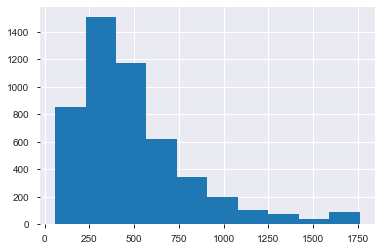

In [1193]:
data_final.TotalSpend.hist()

In [1194]:
# To validate Normality we need to validate below two details

# --> 1. Linear Normal Distribution
# --> 2. Mean == Median == Mode should be equal after distribution

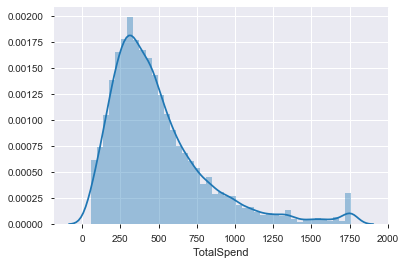

In [1195]:
sns.distplot(data_final.TotalSpend)
plt.show()

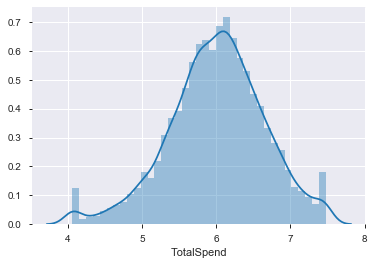

In [1196]:
#Using Logarithmic Distribition

sns.distplot(np.log(data_final.TotalSpend))

In [1199]:
## Validate Skewness in Y Variable distribution

print(data_final.TotalSpend.skew())

print(data_final.Log_Total_Spend.skew())

## We can observe after Log transformation the Y-Variable skewness reduced drastically

1.615173337243418
-0.30005358806310334


In [1018]:
#Insight from above Plot --> Log conversion having better Exponential approach than normal distribution

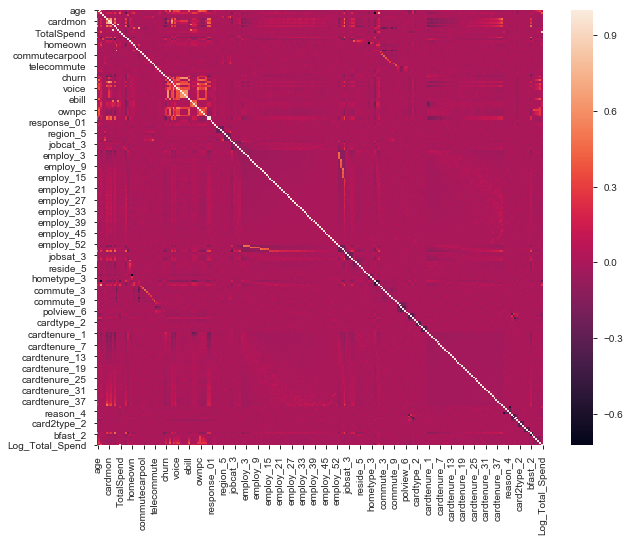

In [1019]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(data_final.corr())

In [1198]:
data_final['Log_Total_Spend'] = np.log(data_final.TotalSpend)
data_final['income'] = np.sqrt(data_final.income)

## Feature  Selection 

#### Basic Techniques

In [598]:
# Correlation Matrix

corr_mat = data_final.corr()
corr_mat.to_csv('Corr_Mat.csv')

In [181]:
## Important Vaiable Based on Coorelation Matrix

'income','ed','gender','carcatvalue_1','carcatvalue_3','carcatvalue_2','retire','owndvd','ownvcr','reason_2','carown','card_1','card_2','card_3','card2_1','card2_2','card2_3','card_4',
'card2_5','card2_4','employ_1','employ_17','equip','tollfree','response_03','jobcat_2','homeown','vote','owntv','ownpda','wireless','hometype_2','empcat_5','callwait','forward',
'internet_4','ownfax','pager','callid','confer','Log_Total_Spend','TotalSpend'


####  Modifying finalData set based on Corr Matrix - Choosing Final List of Variables

In [1200]:
##Based on Correlation Matrix - Below List of variables has been fetched having p>0.05

var_list = ['income','ed','gender','carcatvalue_1','carcatvalue_3','carcatvalue_2','retire','owndvd','ownvcr','reason_2','carown','card_2','card_3','card2_2','card2_3','card_4',
'card2_5','card2_4','employ_1','employ_17','equip','tollfree','response_03','jobcat_2','homeown','vote','owntv','ownpda','wireless','hometype_2','empcat_5','callwait','forward',
'internet_4','ownfax','pager','callid','confer','Log_Total_Spend','TotalSpend','reason_4']

data_final = data_final[var_list]

In [1201]:
#Calculating CV for all the variables and deleting Variable having cv_vars<0.05

cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x) )
data = pd.DataFrame(cv_vars)

In [1202]:
cv_variable = data.sort_values(by=[0],ascending=False)
cv_variable = cv_variable.rename(columns={0:'Variable'})

In [1203]:
##Selecting the List of variables having CV value >0.1

cv_variable

Variable
Log_Total_Spend  9.310971
owntv            7.604178
ed               4.485865
ownvcr           3.293682
owndvd           3.251780
income           2.532767
carown           1.690569
TotalSpend       1.528785
homeown          1.303758
vote             1.036672
gender           1.007226
forward          0.961924
carcatvalue_1    0.960384
callwait         0.958846
confer           0.956927
tollfree         0.952335
callid           0.951571
equip            0.719020
jobcat_2         0.698638
hometype_2       0.669653
card2_3          0.618663
wireless         0.606313
card_4           0.606313
card2_2          0.593057
carcatvalue_2    0.582585
card_2           0.576427
pager            0.567496
card_3           0.561951
card2_4          0.543758
empcat_5         0.541905
ownpda           0.501562
ownfax           0.466616
carcatvalue_3    0.448394
retire           0.416123
internet_4       0.364009
response_03      0.338128
employ_1         0.290454
card2_5          0.272239
reason_2         0.269687
reason_4         0.146460
employ_17        0.137668

#### Splitting the Data into Train and Test Data - Using Regularization Feature Reduction and Analysis

In [1204]:
train_reg , test_reg = train_test_split(data_final, test_size = 0.5)

In [1205]:
feature_columns = data_final.columns.difference(['Log_Total_Spend', 'TotalSpend'])
feature_columns

Index(['callid', 'callwait', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'carown', 'confer', 'ed', 'empcat_5', 'employ_1', 'employ_17', 'equip', 'forward', 'gender', 'homeown', 'hometype_2', 'income', 'internet_4', 'jobcat_2', 'owndvd', 'ownfax', 'ownpda', 'owntv', 'ownvcr', 'pager', 'reason_2', 'reason_4', 'response_03', 'retire', 'tollfree', 'vote', 'wireless'], dtype='object')

In [1206]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

### Feature Reduction

#### Using Regularization for performing Feature Reduction

#### 1. Linear Regression Model

In [1207]:
# Creating Train and Test Dataset

X = data_final[feature_columns]
Y = data_final['Log_Total_Spend']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [1208]:
# Initializing Model - Linear Regression to come up with Coefficients

linreg_model = linear_model.LinearRegression()

In [1209]:
# Fitting Model

ln_model=linreg_model.fit(X_train,Y_train)

y_pred=ln_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

#metrics.mean_absolute_error(Y_train,y_pred)
metrics.mean_absolute_error(Y_test,y_pred)

0.4067169125448667

In [1210]:
Non_Reg_coef = pd.DataFrame(linreg_model.coef_,X_train.columns,columns=['Non_Reg_Coefficient'])
Non_Reg_coef

Non_Reg_Coefficient
callid                   -0.029595
callwait                  0.017215
carcatvalue_1            -0.022272
carcatvalue_2            -0.023889
carcatvalue_3            -0.063154
card2_2                  -0.387809
card2_3                  -0.362324
card2_4                  -0.364934
card2_5                  -0.255043
card_2                   -0.467414
card_3                   -0.492828
card_4                   -0.584461
carown                    0.029797
confer                   -0.020092
ed                       -0.004628
empcat_5                 -0.021521
employ_1                 -0.039592
employ_17                 0.219375
equip                     0.014843
forward                   0.008496
gender                   -0.065056
homeown                  -0.026793
hometype_2               -0.034526
income                    0.089218
internet_4                0.066891
jobcat_2                 -0.001558
owndvd                    0.110922
ownfax                    0.001722
ownpda                    0.007608
owntv                     0.018564
ownvcr                    0.005102
pager                    -0.031721
reason_2                  0.278899
reason_4                 -0.129550
response_03               0.031736
retire                   -0.129602
tollfree                  0.001356
vote                      0.010478
wireless                  0.031882

#### 2.  Using Ridge for performing Feature Reduction

In [1211]:
# Initializing Model

tuned_parameters = [{'alpha': [0.001,0.01,0.1,1.,10.,100.]}]

RidgeCV = GridSearchCV(linear_model.Ridge(),
                   tuned_parameters,
                   cv=5,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

RidgeCV.fit(X_train,Y_train)

print('Best combination:', RidgeCV.best_params_);

Best combination: {'alpha': 1.0}


In [1212]:
# Fitting Model

Ridge=linear_model.Ridge(alpha=0.1)

Ridge_model=Ridge.fit(X_train,Y_train)

y_pred=Ridge_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

metrics.mean_absolute_error(Y_test,y_pred)

0.4067074896547101

In [1213]:
# Finding the Coefficients

Ridge_coef = pd.DataFrame(Ridge.coef_,X_train.columns,columns=['Ridge_Coefficient'])
Ridge_coef

Ridge_Coefficient
callid                 -0.029588
callwait                0.017216
carcatvalue_1          -0.022250
carcatvalue_2          -0.023851
carcatvalue_3          -0.063082
card2_2                -0.387454
card2_3                -0.361969
card2_4                -0.364489
card2_5                -0.254659
card_2                 -0.467114
card_3                 -0.492511
card_4                 -0.584075
carown                  0.029782
confer                 -0.020091
ed                     -0.004625
empcat_5               -0.021505
employ_1               -0.039580
employ_17               0.219018
equip                   0.014854
forward                 0.008494
gender                 -0.065067
homeown                -0.026772
hometype_2             -0.034509
income                  0.089216
internet_4              0.066884
jobcat_2               -0.001558
owndvd                  0.110881
ownfax                  0.001726
ownpda                  0.007593
owntv                   0.018611
ownvcr                  0.005140
pager                  -0.031710
reason_2                0.278836
reason_4               -0.129378
response_03             0.031740
retire                 -0.129581
tollfree                0.001353
vote                    0.010480
wireless                0.031870

#### 3. Using Lasso for performing Feature Reduction

In [1214]:
# Initializing Model

tuned_parameters = [{'alpha': [0.0,0.0001,0.001,0.01,0.1,1.,10.,100.]}]

LassoCV = GridSearchCV(linear_model.Lasso(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

LassoCV.fit(X_train,Y_train)

print('Best combination:', LassoCV.best_params_);

Best combination: {'alpha': 0.001}


In [1215]:
# Fitting Model
Lasso = linear_model.Lasso(alpha=0.0001)
Lasso.fit(X_train,Y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1216]:
# Finding the Coefficients

lasso_coef = pd.DataFrame(Lasso.coef_,X_train.columns,columns=['Lasso_Coefficient'])
lasso_coef

Lasso_Coefficient
callid                 -0.028429
callwait                0.016381
carcatvalue_1          -0.017537
carcatvalue_2          -0.018080
carcatvalue_3          -0.056718
card2_2                -0.384452
card2_3                -0.358883
card2_4                -0.361115
card2_5                -0.251025
card_2                 -0.465587
card_3                 -0.490716
card_4                 -0.581991
carown                  0.027177
confer                 -0.019080
ed                     -0.004502
empcat_5               -0.020110
employ_1               -0.038238
employ_17               0.213064
equip                   0.014494
forward                 0.007808
gender                 -0.064720
homeown                -0.025074
hometype_2             -0.033018
income                  0.089125
internet_4              0.065964
jobcat_2               -0.001175
owndvd                  0.110998
ownfax                  0.000828
ownpda                  0.006971
owntv                   0.013542
ownvcr                  0.004845
pager                  -0.029573
reason_2                0.277943
reason_4               -0.124954
response_03             0.030751
retire                 -0.130297
tollfree                0.000547
vote                    0.010140
wireless                0.031036

#### 4.  Using Elastic Net for performing Feature Reduction

In [1217]:
# Initializing Model

tuned_parameters = [{'alpha': [0.0001,0.001,0.01,0.1,1.,10.,100.]}]

ElasticNet_CV = GridSearchCV(linear_model.ElasticNet(),
                   tuned_parameters,
                   cv=10,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error')

ElasticNet_CV.fit(X_train,Y_train)

print('Best combination:', ElasticNet_CV.best_params_);

Best combination: {'alpha': 0.001}


In [1218]:
# Fitting Model
EN = linear_model.ElasticNet(alpha=0.1)
EN_model=EN.fit(X_train,Y_train)


y_pred=EN_model.predict(X_test)
#metrics.r2_score(Y_train,y_pred)

metrics.mean_absolute_error(Y_test,y_pred)

#X_train,X_test,Y_train,Y_test
#metrics.mean_squared_error(train.actual_sales , train.pred_sales)

0.44906593126525157

In [1219]:
# Finding the Coefficients

elastic_coef = pd.DataFrame(EN.coef_,X_train.columns,columns=['Elastic_Net_Coefficient'])
elastic_coef

Elastic_Net_Coefficient
callid                       -0.000000
callwait                     -0.000000
carcatvalue_1                -0.000000
carcatvalue_2                 0.000000
carcatvalue_3                 0.000000
card2_2                      -0.000000
card2_3                      -0.000000
card2_4                       0.000000
card2_5                      -0.000000
card_2                       -0.000000
card_3                       -0.000000
card_4                       -0.000000
carown                        0.000000
confer                       -0.000000
ed                            0.000000
empcat_5                     -0.000000
employ_1                     -0.000000
employ_17                     0.000000
equip                         0.000000
forward                      -0.000000
gender                       -0.000000
homeown                       0.000000
hometype_2                   -0.000000
income                        0.090857
internet_4                    0.000000
jobcat_2                     -0.000000
owndvd                        0.000000
ownfax                        0.000000
ownpda                        0.000000
owntv                         0.000000
ownvcr                        0.000000
pager                         0.000000
reason_2                      0.000000
reason_4                     -0.000000
response_03                   0.000000
retire                       -0.000000
tollfree                     -0.000000
vote                          0.000000
wireless                      0.000000

### Comparing Coefficients

In [1220]:
pd.concat([Non_Reg_coef,Ridge_coef,lasso_coef,elastic_coef],axis=1)

Non_Reg_Coefficient  Ridge_Coefficient  Lasso_Coefficient  Elastic_Net_Coefficient
callid                   -0.029595          -0.029588          -0.028429                -0.000000
callwait                  0.017215           0.017216           0.016381                -0.000000
carcatvalue_1            -0.022272          -0.022250          -0.017537                -0.000000
carcatvalue_2            -0.023889          -0.023851          -0.018080                 0.000000
carcatvalue_3            -0.063154          -0.063082          -0.056718                 0.000000
card2_2                  -0.387809          -0.387454          -0.384452                -0.000000
card2_3                  -0.362324          -0.361969          -0.358883                -0.000000
card2_4                  -0.364934          -0.364489          -0.361115                 0.000000
card2_5                  -0.255043          -0.254659          -0.251025                -0.000000
card_2                   -0.467414          -0.467114          -0.465587                -0.000000
card_3                   -0.492828          -0.492511          -0.490716                -0.000000
card_4                   -0.584461          -0.584075          -0.581991                -0.000000
carown                    0.029797           0.029782           0.027177                 0.000000
confer                   -0.020092          -0.020091          -0.019080                -0.000000
ed                       -0.004628          -0.004625          -0.004502                 0.000000
empcat_5                 -0.021521          -0.021505          -0.020110                -0.000000
employ_1                 -0.039592          -0.039580          -0.038238                -0.000000
employ_17                 0.219375           0.219018           0.213064                 0.000000
equip                     0.014843           0.014854           0.014494                 0.000000
forward                   0.008496           0.008494           0.007808                -0.000000
gender                   -0.065056          -0.065067          -0.064720                -0.000000
homeown                  -0.026793          -0.026772          -0.025074                 0.000000
hometype_2               -0.034526          -0.034509          -0.033018                -0.000000
income                    0.089218           0.089216           0.089125                 0.090857
internet_4                0.066891           0.066884           0.065964                 0.000000
jobcat_2                 -0.001558          -0.001558          -0.001175                -0.000000
owndvd                    0.110922           0.110881           0.110998                 0.000000
ownfax                    0.001722           0.001726           0.000828                 0.000000
ownpda                    0.007608           0.007593           0.006971                 0.000000
owntv                     0.018564           0.018611           0.013542                 0.000000
ownvcr                    0.005102           0.005140           0.004845                 0.000000
pager                    -0.031721          -0.031710          -0.029573                 0.000000
reason_2                  0.278899           0.278836           0.277943                 0.000000
reason_4                 -0.129550          -0.129378          -0.124954                -0.000000
response_03               0.031736           0.031740           0.030751                 0.000000
retire                   -0.129602          -0.129581          -0.130297                -0.000000
tollfree                  0.001356           0.001353           0.000547                -0.000000
vote                      0.010478           0.010480           0.010140                 0.000000
wireless                  0.031882           0.031870           0.031036                 0.000000

#### As per Above Multicollinearity and less important varaible using Lasso,Ridge,ELastic - We have chosen below variable for Testing

<span style="color:green"><br>
(1) carcatvalue_1<br>
(2) carcatvalue_3<br>
(3) card2_2<br>
(4) card2_3<br>
(5) card2_4<br>
(6) card2_5<br>
(7) card_2<br>
(8) card_3<br>
(9) card_4<br>
(10) card_4<br>
(11) gender<br>
(12) income<br>
(13) reason_2<br>
(14) retire<br>
(15) carown<br>
(16) reason_4
</span>

### Features Selcted by RFE

In [1221]:
# Importing Module for performing RFE

from sklearn.feature_selection import RFE

#  Initializing RFE model with using 8 as input to have the 15 most important features in the output.

rfe = RFE(linreg_model, 15)

# Fitting RFE Model

rfe = rfe.fit(X_train, Y_train)

# Printing the 15 selected Features

print('Selected features: %s' % list(X_train.columns[rfe.support_]))


Selected features: ['card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'employ_17', 'gender', 'income', 'internet_4', 'owndvd', 'reason_2', 'reason_4', 'retire']


In [1222]:
from sklearn.tree import DecisionTreeRegressor

### Finding which set of features give better accuracy (using Decision Trees)

#### Accuracy using Lasso dataset

In [1223]:
# Creating Train and Test Dataset for Lasso

X_L = data_final[['carcatvalue_1','carcatvalue_3','card2_2','card2_3','card2_4','card2_5','card_2','card_3','card_4','gender','income','reason_2','retire','retire','carown']]
Y = data_final['Log_Total_Spend']
X_L_train,X_L_test,Y_L_train,Y_L_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [1224]:
# Initalizing and Fitting Decesion Tree Model on Lasso Selected features

DTR = DecisionTreeRegressor()
DTR.fit(X_L_train,Y_L_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1225]:
# Finding Accuracy on Test dataset

Pred_DTR_L = DTR.predict(X_L_test)
Lasso_Accuracy = metrics.r2_score(Y_L_test,Pred_DTR_L)
Lasso_Accuracy

-0.6527500723053175

#### Accuracy using RFE dataset

In [1226]:
# Creating Train and Test Dataset for Lasso

X_RFE = data_final[['card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'employ_1', 'employ_17', 'gender', 'income', 'internet_4', 'owndvd', 'reason_2', 'retire']]
Y = data_final['Log_Total_Spend']
X_RFE_train,X_RFE_test,Y_RFE_train,Y_RFE_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [1227]:
# Initalizing and Fitting Decesion Tree Model on Lasso Selected features

DTR = DecisionTreeRegressor()
DTR.fit(X_RFE_train,Y_RFE_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1228]:
# Finding Accuracy on Test dataset

Pred_DTR_RFE = DTR.predict(X_RFE_test)
RFE_Accuracy = metrics.r2_score(Y_RFE_test,Pred_DTR_RFE)
RFE_Accuracy

-0.6876620016741835

<span style="color:brown"> <i>The features that were selected using Regularization were : </span>
<span style="color:green"><br>
(1) carown<br>
(2) card2_2<br>
(3) card2_3<br>
(4) card2_4<br>
(5) card2_5<br>
(6) card_2<br>
(7) card_3<br>
(8) card_4<br>
(9) gender<br>
(10) income<br>
(11) reason_2<br>
(12) retire<br>
(13) reason_4
</span>

## Model Building - OLS & ML Model


#### Tradaitional Model - OLS Regression

In [1229]:
final_feature_columns = data_final[['card2_2','card2_3','card2_4','card2_5','card_2','card_3','card_4','gender','income','reason_2','retire','reason_4']]

In [1230]:
# method 2: divide the data into training and testing
train_x, test_x, train_y, test_y = train_test_split(final_feature_columns, 
                                            data_final.Log_Total_Spend, test_size = 0.3, random_state = 12345)

In [1231]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train_reg), ' | ', 'No of obs in testing: ', len(test_reg))

No of obs in training:  2500  |  No of obs in testing:  2500


In [1232]:
### OLS Regression Model


import statsmodels.formula.api as sm
model_fit = sm.ols('Log_Total_Spend ~ card2_2 + card2_3 + card2_4 + card2_5 + card_2 + card_3 + card_4   + gender + income + reason_2 + retire + reason_4',data= train_reg).fit()

In [1233]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Total_Spend   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     97.67
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          2.57e-198
Time:                        12:40:09   Log-Likelihood:                -1972.8
No. Observations:                2500   AIC:                             3972.
Df Residuals:                    2487   BIC:                             4047.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2297      0.050    123.655      0.0

In [1234]:
#Transforming log values into actual values in both training and testing data sets

#Predicted using OLS Model
train_reg['Predicted_TotalSpend'] = np.exp(model_fit.predict(train_reg))
test_reg['Predicted_TotalSpend'] = np.exp(model_fit.predict(test_reg))

In [1235]:
train_reg.head()

income  ed  gender  carcatvalue_1  carcatvalue_3  carcatvalue_2  retire  owndvd  ownvcr  reason_2  carown  card_2  card_3  card2_2  card2_3  card_4  card2_5  card2_4  employ_1  employ_17  equip  tollfree  response_03  jobcat_2  homeown  vote  owntv  ownpda  wireless  hometype_2  empcat_5  callwait  forward  internet_4  ownfax  pager  callid  confer  Log_Total_Spend  TotalSpend  reason_4  Predicted_TotalSpend
1110  6.244998  12       0              1              0              0       1       1       1         0       1       0       1        0        0       0        0        1         0          0      0         0            0         0        0     0      1       0         0           1         1         0        0           0       0      0       1       0         6.157127      472.07         0            293.580504
4539  6.403124  11       0              0              0              1       0       1       1         0       1       0       0        1        0       1        0        0         0          0      0         1            0         1        0     1      1       1         0           1         0         1        1           0       0      1       1       1         5.795571      328.84         1            240.644144
2605  4.690416  18       0              1              0              0       0       0       0         0       1       0       1        1        0       0        0        0         0          0      0         0            0         0        1     0      1       0         0           0         0         0        0           0       0      0       0       0         5.821980      337.64         0            293.465328
4329  6.244998  11       0              0              0              1       0       1       1         0       1       0       1        0        0       0        0        1         0          0      0         0            0         0        0     1      1       0         0           1         0         0        0           0       0      0       0       0         6.128636      458.81         0            333.323074
195   7.681146   8       0              0              0              1       0       1       1         0       1       0       0        0        1       0        0        0         0          0      0         1            0         0        1     1      1       0         0           0         1         1        1           0       0      0       0       0         5.850448      347.39         0            619.424741

In [1236]:
#Checking Metrics for Both Train and Test Data - Check Manually Train and Test Data

print("MAPE for Training and testing data sets:")
MAPE_train = np.abs(np.mean(np.abs(train_reg.TotalSpend - train_reg.Predicted_TotalSpend)/train_reg.TotalSpend))
print(MAPE_train)
MAPE_train = np.mean(np.abs(test_reg.TotalSpend - test_reg.Predicted_TotalSpend)/test_reg.TotalSpend)
print(MAPE_train)

print("\nMSE for Training and testing data sets:")
#MSE for training and testing data sets                           
print(metrics.mean_squared_error(train_reg.TotalSpend,train_reg.Predicted_TotalSpend)) 
print(metrics.mean_squared_error(test_reg.TotalSpend,test_reg.Predicted_TotalSpend))


print("\nRMSE for Training and testing data sets:")
#RMSE for training and testing data sets                           
print(np.sqrt(metrics.mean_squared_error(train_reg.TotalSpend,train_reg.Predicted_TotalSpend)))
print(np.sqrt(metrics.mean_squared_error(test_reg.TotalSpend,test_reg.Predicted_TotalSpend)))

MAPE for Training and testing data sets:
0.4825167142646203
0.48349725612612027

MSE for Training and testing data sets:
71522.37322214732
77559.94963455155

RMSE for Training and testing data sets:
267.4366714236238
278.49587004936274


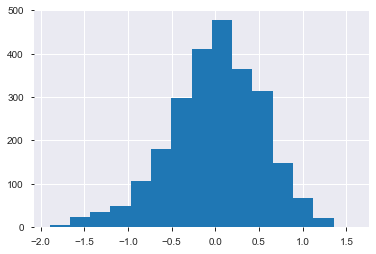

In [1237]:
#Checking Error distribution

model_fit.resid.hist(bins=15)
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

In [1238]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train_reg['Deciles'] = pd.qcut(train_reg['Predicted_TotalSpend'],10,labels=False)
test_reg['Deciles']  = pd.qcut(test_reg['Predicted_TotalSpend'],10,labels=False)

In [1239]:
# Decile Analysis for train data

Predicted_avg = train_reg[['Deciles','Predicted_TotalSpend']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['Predicted_TotalSpend']
Actual_avg = train_reg[['Deciles','TotalSpend']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['TotalSpend']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

Predicted_TotalSpend  TotalSpend
Deciles                                  
9                  829.648270  906.656106
8                  597.206564  683.027998
7                  514.673417  584.198061
6                  462.825131  496.795079
5                  406.033590  474.052621
4                  361.187886  420.990010
3                  328.281707  385.243390
2                  303.142741  361.158631
1                  279.612966  319.223837
0                  236.293174  266.579168

In [1240]:
# Decile Analysis for test data
Predicted_avg = test_reg[['Deciles','Predicted_TotalSpend']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['Predicted_TotalSpend']
Actual_avg = test_reg[['Deciles','TotalSpend']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['TotalSpend']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

Predicted_TotalSpend  TotalSpend
Deciles                                  
9                  810.836247  887.591994
8                  598.066713  705.139547
7                  515.996409  596.715149
6                  469.417853  521.140232
5                  420.658161  466.783025
4                  373.899936  453.571450
3                  333.346939  390.015750
2                  305.634418  350.664931
1                  279.575101  325.288235
0                  239.325735  275.404046

###  VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [1241]:
parameters = 'Log_Total_Spend ~ ' + ' + '.join(final_feature_columns.columns)

In [1242]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(parameters, train_reg, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)

Features  VIF Factor
0   Intercept        22.2
1     card2_2         2.1
2     card2_3         2.2
3     card2_4         2.2
4     card2_5         1.4
5      card_2         1.7
6      card_3         1.7
7      card_4         1.9
8      gender         1.0
9      income         1.2
10   reason_2         1.0
11     retire         1.1
12   reason_4         1.0

#### feature selection based on importance using F - Regression

In [1243]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = train_x
target = train_y
F_values, p_values  = f_regression(features, target )

In [1244]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

Variable     F_Value P_Value
0    card2_2   25.838036   0.000
1    card2_3   28.797626   0.000
2    card2_4   13.792372   0.000
3    card2_5   14.986358   0.000
4     card_2   39.350668   0.000
5     card_3   55.343927   0.000
6     card_4   18.883352   0.000
7     gender   22.472780   0.000
8     income  627.452454   0.000
9   reason_2   87.351071   0.000
10    retire  127.817863   0.000
11  reason_4    8.137108   0.004

In [1245]:
f_reg_results.sort_values(by = ['P_Value'])
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [1246]:
f_reg_results_new = f_reg_results[f_reg_results.P_Value <= 0.1]
f_reg_results_new

Variable     F_Value  P_Value
0    card2_2   25.838036    0.000
1    card2_3   28.797626    0.000
2    card2_4   13.792372    0.000
3    card2_5   14.986358    0.000
4     card_2   39.350668    0.000
5     card_3   55.343927    0.000
6     card_4   18.883352    0.000
7     gender   22.472780    0.000
8     income  627.452454    0.000
9   reason_2   87.351071    0.000
10    retire  127.817863    0.000
11  reason_4    8.137108    0.004

## Machine Learning - Implementation on Model

### 1. Decison Tree Regressor

In [1247]:
#Import Packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor,export_graphviz,export
from sklearn.model_selection import GridSearchCV

In [1248]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [1249]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( train_x, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [1250]:
tree.best_score_

0.15277733943454014

In [1251]:
tree.best_params_

{'max_depth': 4, 'max_features': 3}

In [1252]:
tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=3,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1253]:
tree_train_pred= tree.predict(train_x)
tree_test_pred= tree.predict(test_x)

In [1254]:
#Accuracy Metrics for the Train and Test Data

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.0796289687158522
0.0819272716790973

RMSE values for training and testing data :
0.5921581808378767
0.5930840085911423


### Ensemble Learning

#### 1. Bagging

In [1255]:
#Importing required Packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [1256]:
## Model Building

param_ada = {'n_estimators':[50,60,70,80,90,100]}

gscv_Bagging = GridSearchCV(estimator=BaggingRegressor(),param_grid = param_ada , cv = 5, n_jobs= -1)

data_Bagging = gscv_Bagging.fit(train_x,train_y)

In [1257]:
data_Bagging

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1258]:
#Predicting values for both training and testing data sets

bagg_train_pred = data_Bagging.predict(train_x)
bagg_test_pred =  data_Bagging.predict(test_x)

In [1259]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - bagg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- bagg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,bagg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,bagg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.046227734856201144
0.08490049284504145

RMSE values for training and testing data :
0.3575021657427202
0.6169531784055845


### 2. Random Forest Regression

In [1260]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
         

In [1261]:
#Predicting values for both training and testing data sets

rf_train_pred = data_rf.predict(train_x)
rf_test_pred =  data_rf.predict(test_x)

In [1262]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.07618086341613668
0.07844845403572849

RMSE values for training and testing data :
0.5655496153469449
0.5742025455763354


### 3. Boosting 

#### 1. Adaptive Boosting

In [1263]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.7s finished


In [1264]:
#Predicting values for both training and testing data sets

boost_train_pred=data_boost.predict(train_x)
boost_test_pred=data_boost.predict(test_x)

In [1265]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - boost_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- boost_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,boost_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,boost_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.0769864795551563
0.07774261008303184

RMSE values for training and testing data :
0.5719298868585965
0.5742822175092581


### 2. Gradient Boosting

In [1266]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_gradBoost = GridSearchCV(estimator= GradientBoostingRegressor(), 
                              param_grid= param_grid, 
                              cv = 5,
                              verbose= True,
                              n_jobs= -1)
data_gbm = gscv_gradBoost.fit(train_x , train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


In [1267]:
#Predicting values for both training and testing data sets
gbm_train_pred=data_gbm.predict(train_x)
gbm_test_pred=data_gbm.predict(test_x)

In [1268]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - gbm_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- gbm_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.07034998097581234
0.0738290357621992

RMSE values for training and testing data :
0.521928251319334
0.5379524011352399


### 3. XGBoost

In [1269]:
import xgboost

pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

In [1270]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [1271]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.07066107880540046
0.07391617670689749

RMSE values for training and testing data :
0.5235318068356608
0.5376663712937261


### Model Performance

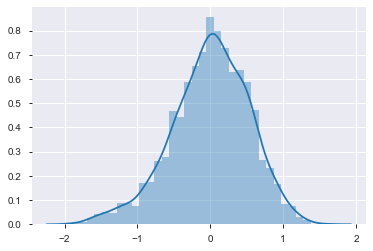

In [1272]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(model_fit.resid)
plt.show()

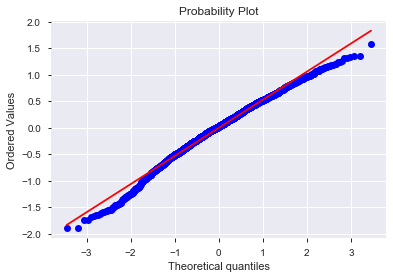

In [1273]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(model_fit.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line

In [1274]:
# assumption: mean of residuals/errors is zero

print(model_fit.resid.mean())

1.9397461414882856e-14


In [1275]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable

print(stats.stats.pearsonr(model_fit.resid, train_reg.Log_Total_Spend))

(0.8244329728056172, 0.0)


In [1276]:
model_fit.resid.shape

(2500,)

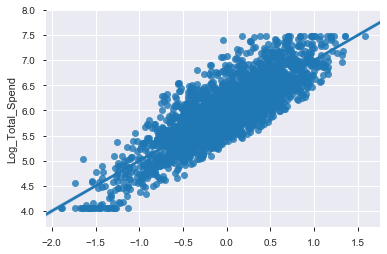

In [1277]:
# assumption: homoscedasticity of residuals/errors
#!pip install --upgrade pip
#!pip install seaborn
import seaborn as sns

sns.regplot(x=model_fit.resid, y=train_reg.Log_Total_Spend)
#sns.jointplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
#sns.scatterplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
plt.show()

In [1278]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [1279]:
# Fitting Polynomial Regression to the dataset

X = data_final[['income']]
y = data_final.Log_Total_Spend

In [1280]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)

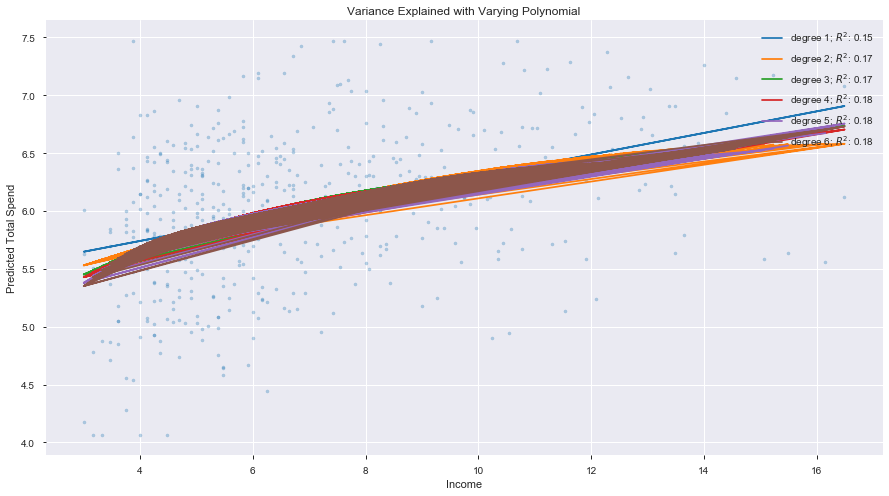

In [1281]:
# Polynomial Regression-nth order
plt.figure(figsize=(15,8))
plt.scatter(x_test_set, y_test_set, s=10, alpha=0.3)

for degree in [1,2,3,4,5,6]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_training_set,y_training_set)

    y_plot = model.predict(x_test_set)

    plt.plot(x_test_set, y_plot, label="degree %d" % degree

             +'; $R^2$: %.2f' % model.score(x_test_set, y_test_set))

plt.legend(loc='upper right')

plt.xlabel("Income")

plt.ylabel("Predicted Total Spend")

plt.title("Variance Explained with Varying Polynomial")

plt.show()

We can notice that R^2 has increased from 0.16 – > 0.17 -> 0.18   with rising in the degree of the polynomial initially
and then it has saturated at 0.18

## Using Models to find Best Parameters

### Building Final Decision Tree Model

In [1283]:
train_X = train_x[train_x.columns.difference(['pred_prob'])]

In [1284]:
clf_tree = DecisionTreeRegressor( max_depth = 3, max_features=4, max_leaf_nodes=5 )
clf_tree.fit( train_x, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=4,
                      max_leaf_nodes=5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1285]:
clf_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03525826, 0.        , 0.        , 0.87270464, 0.0920371 ,
       0.        , 0.        ])

In [1286]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('card2_2', 0.0),
 ('card2_3', 0.0),
 ('card2_4', 0.0),
 ('card2_5', 0.0),
 ('card_2', 0.0),
 ('card_3', 0.03525826320157595),
 ('card_4', 0.0),
 ('gender', 0.0),
 ('income', 0.8727046380143952),
 ('reason_2', 0.09203709878402894),
 ('reason_4', 0.0),
 ('retire', 0.0)]

In [1287]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(15)

Feature  importance
8     income    0.872705
9   reason_2    0.092037
5     card_3    0.035258
0    card2_2    0.000000
1    card2_3    0.000000
2    card2_4    0.000000
3    card2_5    0.000000
4     card_2    0.000000
6     card_4    0.000000
7     gender    0.000000
10  reason_4    0.000000
11    retire    0.000000

In [1288]:
import os     
os.environ["PATH"] += os.pathsep + 'H:/Machine Learning/graphviz-2.38/release/bin'

In [1289]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "bank_tree.odt",
              feature_names = train_X.columns )

In [1290]:
# Converting open document file to jpg imanage

import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'bank_tree.odt' )

In [1291]:
chd_tree_graph.write_jpg( 'bank_tree.jpg' )

True

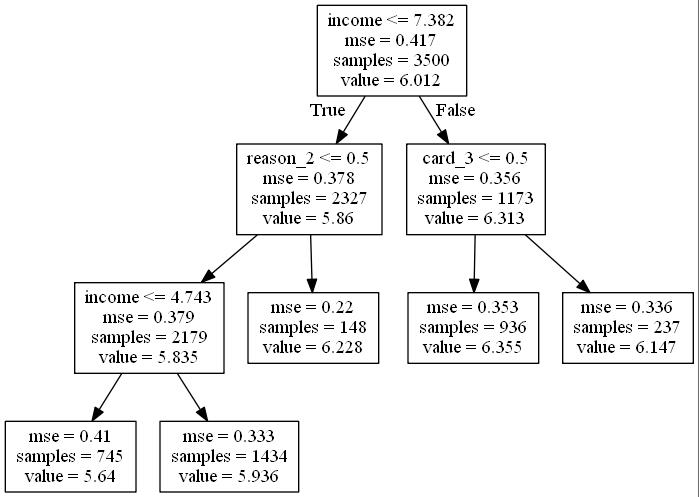

In [1292]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='bank_tree.jpg')

### Random Forest

In [1293]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_x, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

#### Feature importance from the Random Forest Model

In [1294]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [1295]:
import seaborn as sn

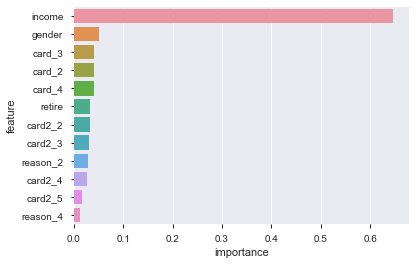

In [1296]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )